# Part (1)- data imputation 

## upload matlab's data

In [115]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
from tqdm.auto import tqdm 

# import requests
# import pandas as pd
# import numpy as np
# import json
# from pandas.io.json import json_normalize
# from datetime import datetime, timedelta
# from dateutil.relativedelta import relativedelta
# from matplotlib import pyplot as plt
# import matplotlib.cm as cm
# import itertools
# import metpy as mp
# import metpy.calc as mpcalc
# import plotly as py
# import plotly.graph_objs as go
# import plotly.figure_factory as ff
# from scipy import special
# import ipywidgets as widgets
# from metpy.units import units


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format = 'retina'

In [116]:
PM25_dict = loadmat('/Users/iditbela/Documents/Broday/AQMdataQC/LoadDataVar_PM25_2000#2018.mat')

In [117]:
PM25_dict.keys()

dict_keys(['__header__', '__version__', '__globals__', 'StNames_Titles', 'SelYears', 'TA', 'README_TA', 'DATA', 'StNames', 'StTypes', 'fffSt', 'README_DATA', 'VarName', 'VarCode', 'VarUnits'])

In [118]:
PM25_dict['SelYears']

array([[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]], dtype=uint16)

In [119]:
type(PM25_dict['DATA']),PM25_dict['DATA'].shape

(numpy.ndarray, (69, 333122))

In [120]:
data = PM25_dict['DATA']
columns = PM25_dict['StNames']

In [121]:
col_list = []
for c in columns:
    col_list.append(c[0][0])

In [122]:
# col_list

In [123]:
np.shape(col_list)

(69,)

In [124]:
PM25 = pd.DataFrame(data.T, columns = col_list)

In [125]:
PM25.tail()

,AFULA,ANTOKOLSKY,AZUR,EHAD_HAAM,HATIKVA,HOLON,IRONID,KVISH4,PETAH_TIKVA_ROAD,RAKEVET_HASHALOM,...,RAANANA,SHFEYA,UM_EL_FAHEM_C,BEIT_RIVKA,BEN_GURION_AIRPORT,BNEI_ATAROT,MODEIN,ASHALIM,GUSH_EZION,NEOT_HAKIKAR
333117,18.9,26.9,NaN,45.0,NaN,28.9,23.1,NaN,NaN,76.3,...,33.4,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333118,26.3,28.5,NaN,39.8,NaN,21.8,28.8,NaN,NaN,74.0,...,18.6,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333119,22.7,29.3,NaN,39.6,NaN,24.1,23.1,NaN,NaN,55.3,...,32.3,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333120,13.3,27.2,NaN,40.4,NaN,45.0,29.5,NaN,NaN,46.0,...,49.8,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## save dataframe

In [12]:
PM25.to_pickle("/Users/iditbela/Documents/Broday/saved_data_from_notebooks/PM25")

In [192]:
PM25 = pd.read_pickle("/Users/iditbela/Documents/Broday/saved_data_from_notebooks/PM25")

## plot map of missing data

In [193]:
PM25.shape

(333122, 69)

In [194]:
thr = 0.6

In [195]:
# see what year I get the highest number of stations 
# and the lowest missing station data rate in each timestep
for year in range(2000,2018):
    times = pd.date_range(start=np.str(year)+'-01-01 00:00:00', end='2018-12-31 23:00:00', freq='30Min') #one less because the last is always nan
    start_year = PM25.shape[0]-times.shape[0]-1
    # reduced PM25 
    r_PM25 = PM25[start_year:-1]
    idx = r_PM25.notnull().sum(axis = 0)/r_PM25.shape[0]>thr
    r_PM25 = r_PM25.loc[:, idx]
    r_PM25.reset_index(inplace=True)
    r_PM25.drop(labels = 'index',axis=1, inplace=True)
    no_s = np.sum(PM25[start_year:].notnull().sum(axis = 0)/PM25[start_year:].shape[0] > thr) 
    # average missing station data of all timesteps if I start in year X. 
    per = np.median(r_PM25.isnull().sum(axis = 1)/r_PM25.shape[1])
    print('year:{}, no_stations:{}, avg_percentage:{}'.format(year,no_s,per))

year:2000, no_stations:16, avg_percentage:0.125
year:2001, no_stations:17, avg_percentage:0.11764705882352941
year:2002, no_stations:17, avg_percentage:0.11764705882352941
year:2003, no_stations:17, avg_percentage:0.11764705882352941
year:2004, no_stations:19, avg_percentage:0.15789473684210525
year:2005, no_stations:21, avg_percentage:0.14285714285714285
year:2006, no_stations:22, avg_percentage:0.13636363636363635
year:2007, no_stations:22, avg_percentage:0.13636363636363635
year:2008, no_stations:22, avg_percentage:0.13636363636363635
year:2009, no_stations:24, avg_percentage:0.16666666666666666
year:2010, no_stations:27, avg_percentage:0.14814814814814814
year:2011, no_stations:32, avg_percentage:0.1875
year:2012, no_stations:34, avg_percentage:0.17647058823529413
year:2013, no_stations:34, avg_percentage:0.14705882352941177
year:2014, no_stations:34, avg_percentage:0.14705882352941177
year:2015, no_stations:36, avg_percentage:0.16666666666666666
year:2016, no_stations:39, avg_perc

In [208]:
times = pd.date_range(start='2013-01-01 00:00:00', end='2018-12-31 23:30:00', freq='30Min') 
times.shape[0]
start_year = PM25.shape[0]-times.shape[0]
start_year
start_year/PM25.shape[0]*19

105168

227953

13.001603021124456

In [209]:
PM25[start_year:].shape

(105168, 69)

In [210]:
# remove the last index as it is always nan
PM25 = PM25[:-1]
times = times[:-1]

In [211]:
# percentage of not-null should be more than 50%
# how many stations?
np.sum(PM25[start_year:].notnull().sum(axis = 0)/PM25[start_year:].shape[0] > thr)

34

In [212]:
# according to what I see, if I take starting 2010 (meaning I will have 10-years data if I include 2019), 
# only stations with not-null values>54% then I will have 33 stations
# if I start 2013, I have 35 stations. 

In [213]:
# percentage of these 33 stations:
x = PM25[start_year:].notnull().sum(axis = 0)/PM25[start_year:].shape[0]

In [214]:
x

AFULA                 0.917322
ANTOKOLSKY            0.904381
AZUR                  0.164747
EHAD_HAAM             0.341676
HATIKVA               0.154183
HOLON                 0.941503
IRONID                0.908099
KVISH4                0.761779
PETAH_TIKVA_ROAD      0.495945
RAKEVET_HASHALOM      0.442144
REMEZ                 0.864786
RISHON_LEZION         0.476823
TAHANA_MERKAZIT       0.319387
YAD_LEBANIM           0.627098
YEFET_YAFO            0.816140
AHUZA_G               0.969696
AKO                   0.296681
ATZMAUT_B             0.892143
BEGIN                 0.215029
HADAR                 0.114038
IGUD                  0.255337
KAKAL                 0.460363
KIRYAT_ATA            0.724467
KIRYAT_BIALIK         0.691167
KIRYAT_BINYAMIN       0.966472
KIRYAT_TIVON          0.960644
NAVE_SHANAAN          0.958105
NESHER                0.847633
PARK_HACARMEL         0.260167
AGRIPAS               0.000000
                        ...   
DALYA                 0.531593
GEDERA  

In [215]:
xs = x.sort_values(ascending=True)

In [216]:
xs

BEIT_RIVKA            0.000000
AGRIPAS               0.000000
ASHKELON              0.000000
BEN_GURION_AIRPORT    0.000000
KVISH9                0.075014
UM_EL_FAHEM_C         0.113125
HADAR                 0.114038
BARKAI                0.145540
HATIKVA               0.154183
OFEK                  0.155410
AZUR                  0.164747
HADERA_B              0.190678
BNEI_ATAROT           0.205312
BEGIN                 0.215029
KFAR_SABA             0.224186
MAGAL                 0.236053
IGUD                  0.255337
PARK_HACARMEL         0.260167
AKO                   0.296681
KARON_KIACH           0.298430
TAHANA_MERKAZIT       0.319387
BNEI_DAROM            0.324560
EHAD_HAAM             0.341676
NAVE_ILAN             0.359485
ASHALIM               0.362252
GUSH_EZION            0.395818
MODEIN                0.431751
RAKEVET_HASHALOM      0.442144
NEOT_HAKIKAR          0.448667
KAKAL                 0.460363
                        ...   
EAST_NEGEV            0.726844
PARDES_H

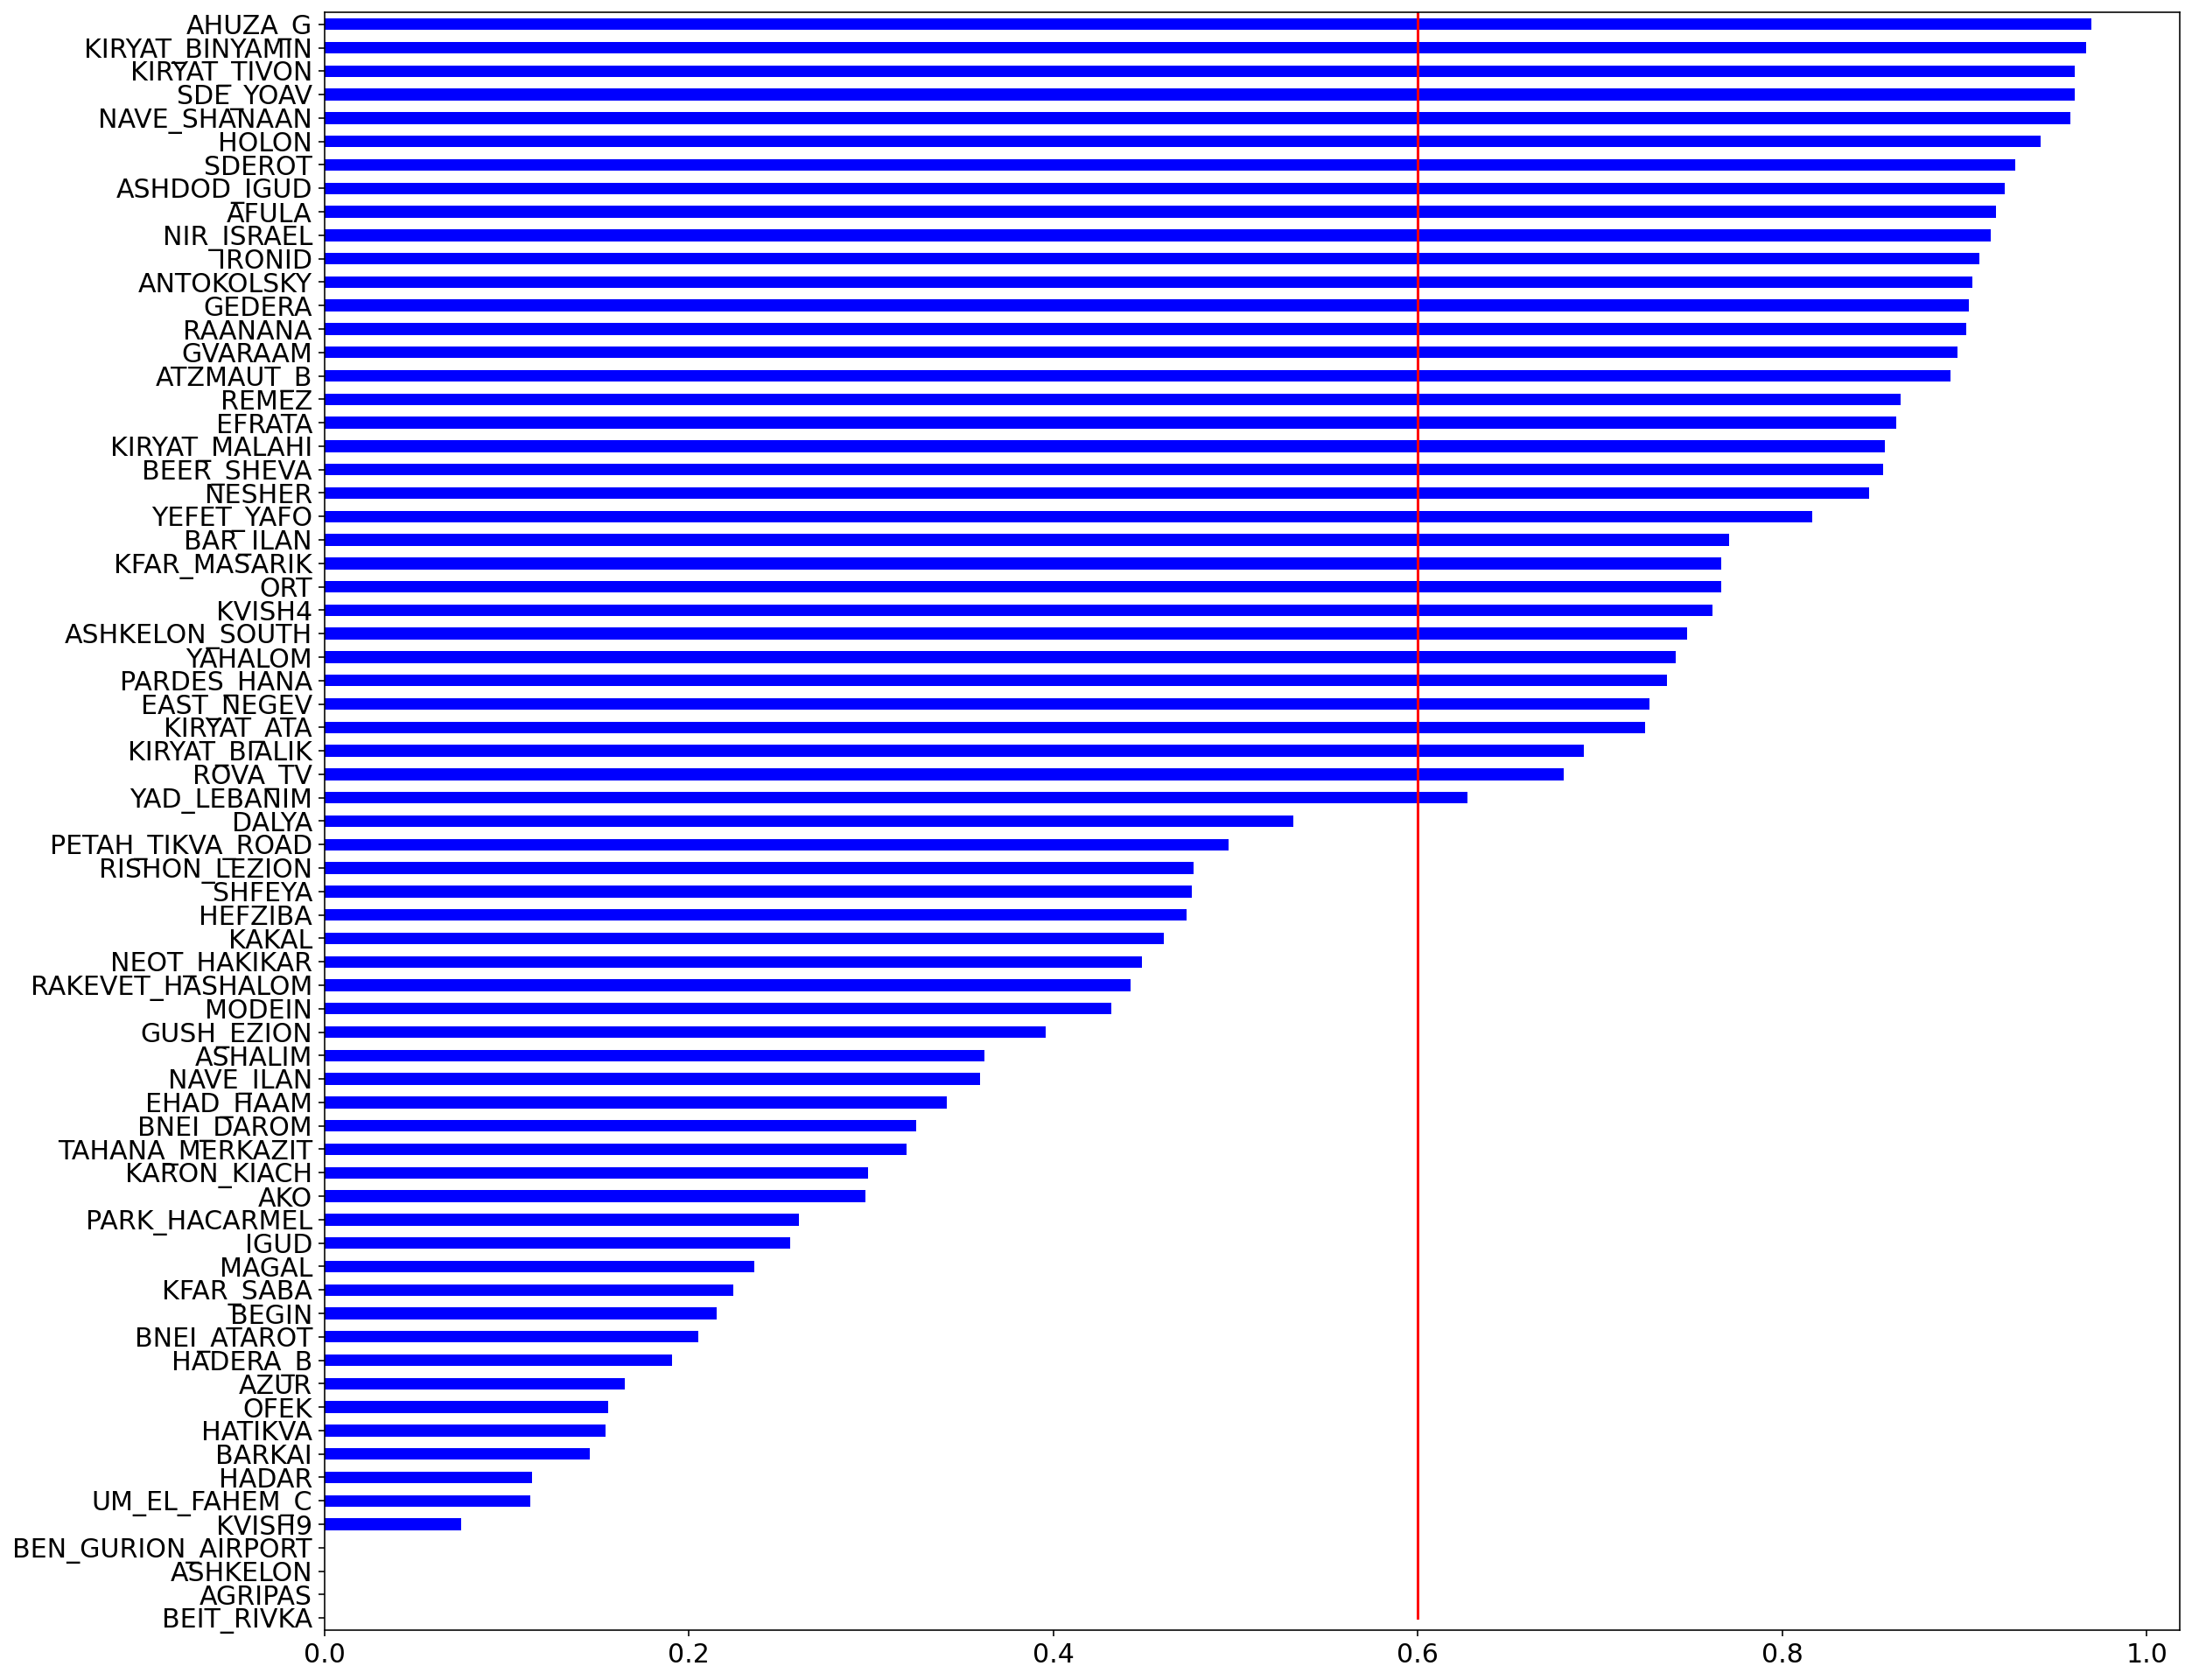

In [242]:
xs.plot(kind='barh',figsize=(19,17),fontsize=15,color='b')
plt.plot(np.ones((100,))*0.6,np.arange(0,100,1),'r')

# plt.savefig("/Users/iditbela/Documents/Broday/saved_data_from_notebooks/stations_2013_2018.png", dpi=500)
plt.tight_layout()

plt.show();

In [225]:
# reduced PM25 
r_PM25 = PM25[start_year:] 
idx = r_PM25.notnull().sum(axis = 0)/r_PM25.shape[0]>thr
r_PM25 = r_PM25.loc[:, idx]

In [226]:
r_PM25.reset_index(inplace=True)
r_PM25.drop(labels = 'index',axis=1, inplace=True)

In [227]:
r_PM25.tail(5)
# r_PM25.shape

,AFULA,ANTOKOLSKY,HOLON,IRONID,KVISH4,REMEZ,YAD_LEBANIM,YEFET_YAFO,AHUZA_G,ATZMAUT_B,...,ORT,ROVA_TV,SDEROT,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,PARDES_HANA,RAANANA
105162,10.6,25.7,20.0,21.4,NaN,33.3,13.8,24.8,22.0,20.4,...,NaN,NaN,20.7,4.0,NaN,15.3,8.4,26.5,32.0,4.4
105163,19.4,27.3,27.0,29.8,NaN,26.0,14.9,28.4,24.7,19.4,...,NaN,NaN,23.6,5.1,NaN,18.3,8.3,25.9,32.5,15.8
105164,18.9,26.9,28.9,23.1,NaN,31.8,14.8,38.4,23.5,29.4,...,NaN,NaN,15.6,4.7,NaN,17.3,24.2,21.6,38.0,33.4
105165,26.3,28.5,21.8,28.8,NaN,30.5,16.9,40.8,20.0,29.0,...,NaN,NaN,19.6,7.0,NaN,19.3,14.9,19.4,37.6,18.6
105166,22.7,29.3,24.1,23.1,NaN,31.1,18.9,43.6,18.7,28.9,...,NaN,NaN,42.8,14.3,NaN,23.7,13.3,26.8,33.0,32.3


In [228]:
r_PM25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105167 entries, 0 to 105166
Data columns (total 34 columns):
AFULA              96472 non-null float64
ANTOKOLSKY         95111 non-null float64
HOLON              99015 non-null float64
IRONID             95502 non-null float64
KVISH4             80114 non-null float64
REMEZ              90947 non-null float64
YAD_LEBANIM        65950 non-null float64
YEFET_YAFO         85831 non-null float64
AHUZA_G            101980 non-null float64
ATZMAUT_B          93824 non-null float64
KIRYAT_ATA         76190 non-null float64
KIRYAT_BIALIK      72688 non-null float64
KIRYAT_BINYAMIN    101641 non-null float64
KIRYAT_TIVON       101028 non-null float64
NAVE_SHANAAN       100761 non-null float64
NESHER             89143 non-null float64
BAR_ILAN           81039 non-null float64
EFRATA             90691 non-null float64
ASHDOD_IGUD        96947 non-null float64
ASHKELON_SOUTH     78629 non-null float64
GEDERA             94917 non-null float64
GVA

In [229]:
# coly and change r_PM25 to binary data

In [230]:
r_PM25[r_PM25.notnull()] = 1
r_PM25[r_PM25.isnull()] = 0

In [231]:
r_PM25.tail()

,AFULA,ANTOKOLSKY,HOLON,IRONID,KVISH4,REMEZ,YAD_LEBANIM,YEFET_YAFO,AHUZA_G,ATZMAUT_B,...,ORT,ROVA_TV,SDEROT,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,PARDES_HANA,RAANANA
105162,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
105163,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
105164,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
105165,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
105166,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [232]:
diffs = r_PM25.diff(axis = 0)

In [233]:
# diffs.iloc[0:50,0]

In [234]:
diffs.tail()

,AFULA,ANTOKOLSKY,HOLON,IRONID,KVISH4,REMEZ,YAD_LEBANIM,YEFET_YAFO,AHUZA_G,ATZMAUT_B,...,ORT,ROVA_TV,SDEROT,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,PARDES_HANA,RAANANA
105162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [235]:
# Only label every 20th value
ticks_to_use = np.arange(0,r_PM25.shape[0]-365*24,366*48)

# Set format of labels (note year not excluded as requested)
labels = [times[i].strftime("%Y") for i in ticks_to_use]

In [236]:
ticks_to_use
labels
r_PM25.shape

array([    0, 17568, 35136, 52704, 70272, 87840])

['2013', '2014', '2015', '2016', '2017', '2018']

(105167, 34)

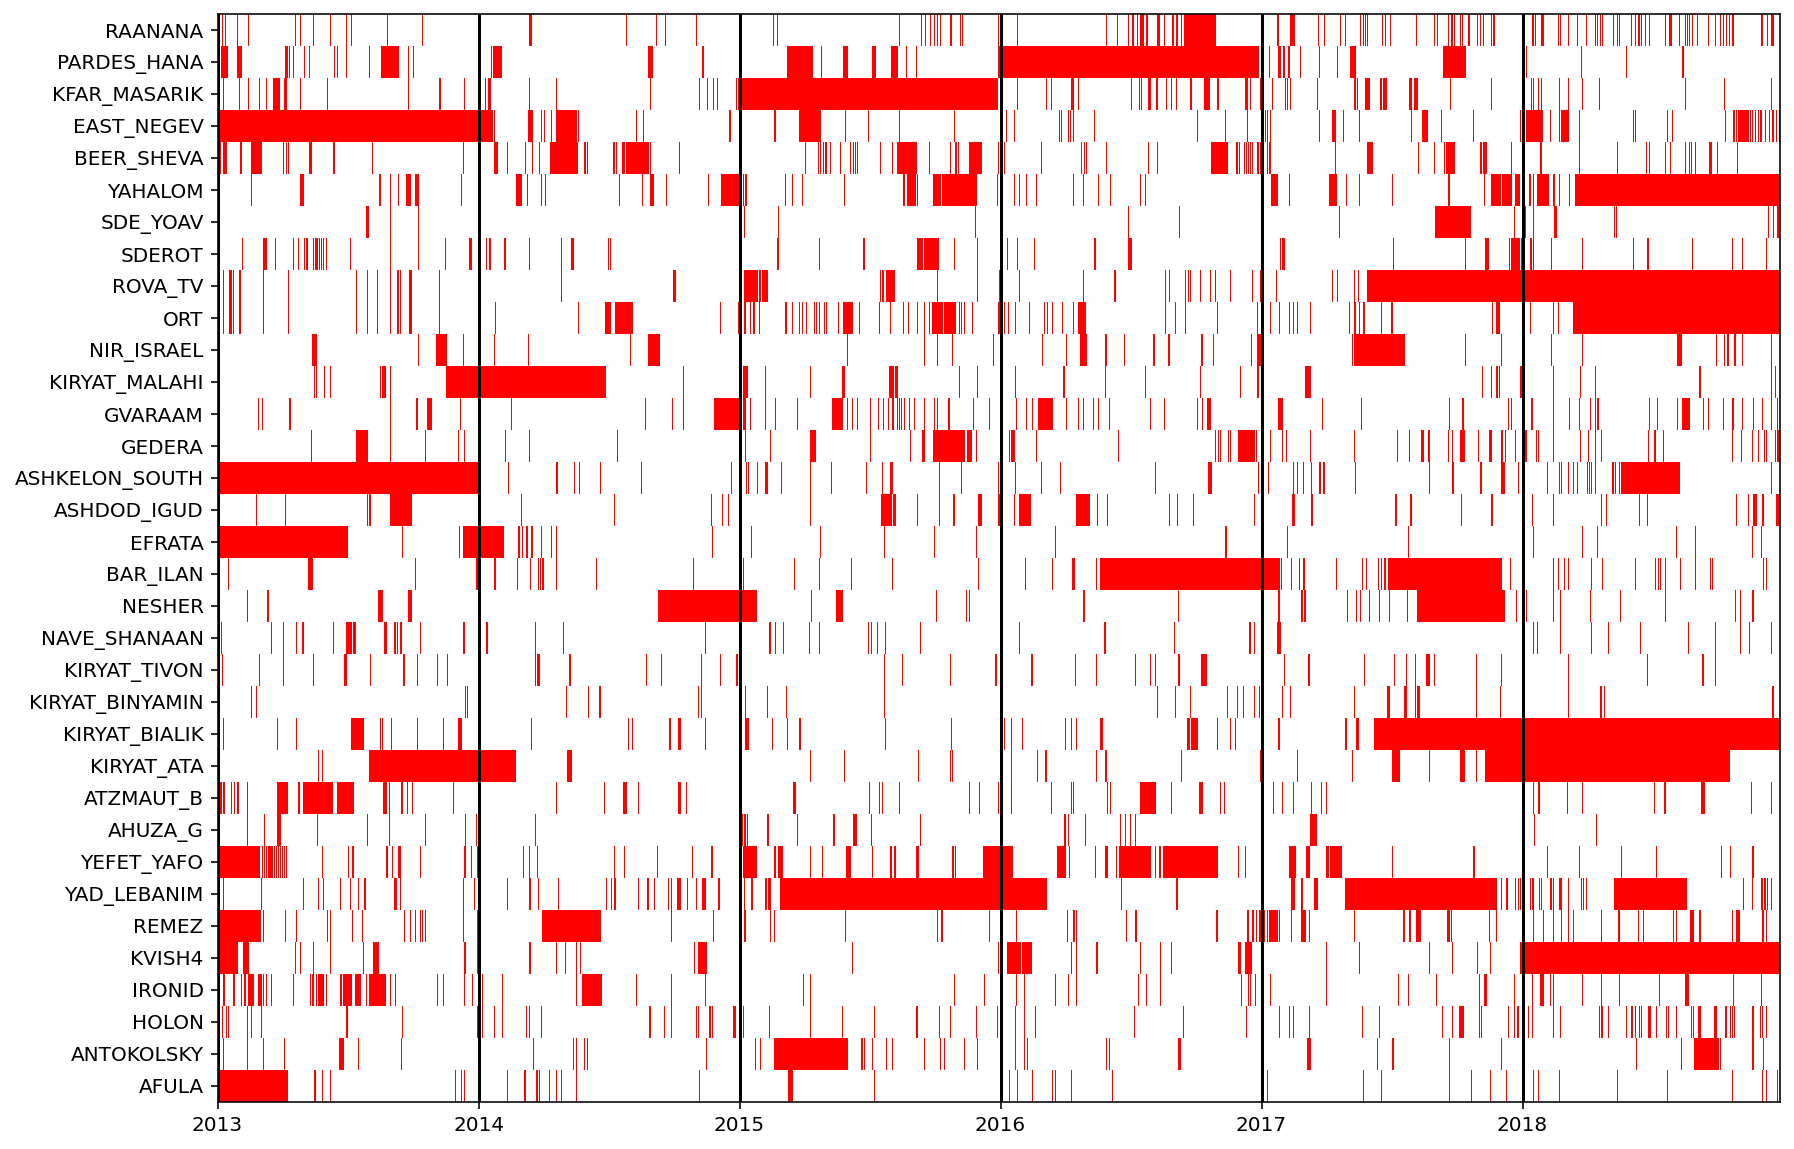

In [262]:
# first row should be manually filled (or ignored)
# -1 is the start of the interval
# 1 is the first where there is no nan 
# I think that I substracted 1 from the end index and it was a bug.

missing_interval_lengths = []
fig, ax = plt.subplots(figsize=(14,10))
for monitor in range(r_PM25.shape[1]):
    
    #begining
    if r_PM25.iloc[0,monitor]==0:
        diffs.iloc[0,monitor]=-1
    
    #end
    if r_PM25.iloc[-1,monitor]==0:
        diffs.iloc[-1,monitor]=1

    row_start = np.where(diffs.iloc[:,monitor] == -1)[0]
    # col_start = np.where(diffs == 1)[1]-1

    row_end = np.where(diffs.iloc[:,monitor] == 1)[0]
    # col_end = np.where(diffs == -1)[1]

    xranges = list(list(zip(row_start,row_end-row_start)))
    missing_interval_lengths.extend(row_end-row_start)
    yrange = (monitor,1)
    plt.broken_barh(xranges, yrange, facecolors='r');


for t in ticks_to_use:
    plt.plot(np.ones((101,))*t,np.arange(0,r_PM25.shape[1]+0.5,(r_PM25.shape[1]+0.5)/100),'k')
    
plt.xlim((0, r_PM25.shape[0])) 
plt.ylim((0, r_PM25.shape[1]))
plt.yticks(ticks=np.arange(0,r_PM25.shape[1])+0.5,labels=r_PM25.columns)

# Now set the ticks and labels
ax.set_xticks(ticks_to_use)
ax.set_xticklabels(labels)

plt.tight_layout()

# plt.savefig("/Users/iditbela/Documents/Broday/saved_data_from_notebooks/Yuvals_plot.png", dpi=500)

plt.show();

# What is the distribution of missing station data in each time step?

In [284]:
r_PM25.head()

,AFULA,ANTOKOLSKY,HOLON,IRONID,KVISH4,REMEZ,YAD_LEBANIM,YEFET_YAFO,AHUZA_G,ATZMAUT_B,...,ORT,ROVA_TV,SDEROT,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,PARDES_HANA,RAANANA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,28.2,55.0,46.0,NaN,NaN,23.2,NaN,17.4,33.1,...,30.1,30.1,46.9,41.0,36.3,38.8,NaN,13.6,16.4,NaN
2,NaN,28.1,55.0,43.8,NaN,NaN,18.9,NaN,17.8,31.2,...,39.2,39.2,45.7,35.1,52.4,35.3,NaN,9.3,16.9,NaN
3,NaN,30.0,55.0,46.7,NaN,NaN,18.5,NaN,17.8,38.8,...,49.0,49.0,54.0,34.4,42.4,33.1,NaN,10.9,16.9,NaN
4,NaN,27.7,55.0,36.0,NaN,NaN,21.7,NaN,16.2,43.3,...,43.8,43.8,48.0,44.9,39.2,25.9,NaN,20.2,11.9,NaN


In [285]:
# reduced PM25 
r_PM25 = PM25[start_year:]
idx = r_PM25.notnull().sum(axis = 0)/r_PM25.shape[0]>thr
r_PM25 = r_PM25.loc[:, idx]

In [286]:
r_PM25.reset_index(inplace=True)
r_PM25.drop(labels = 'index',axis=1, inplace=True)

In [287]:
# r_PM25.isnull().sum(axis = 1)/r_PM25.shape[1]

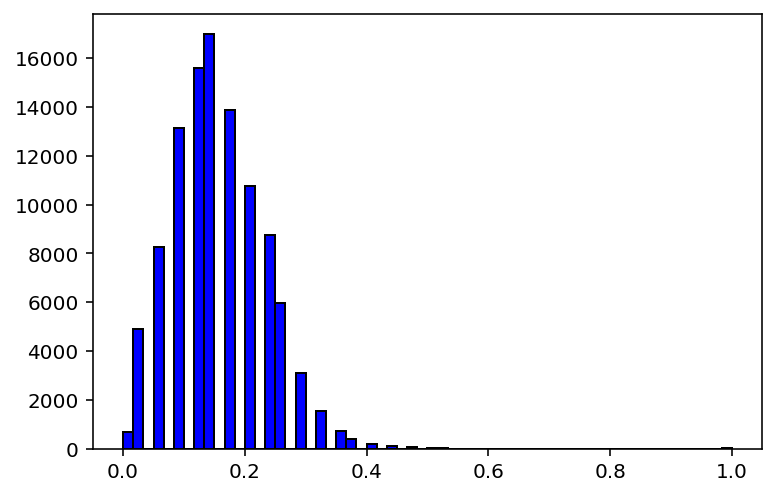

In [288]:
plt.hist(r_PM25.isnull().sum(axis = 1)/r_PM25.shape[1],
         color = 'blue', edgecolor = 'black',bins=60);



In [289]:
np.mean(r_PM25.isnull().sum(axis = 1)/r_PM25.shape[1])

0.15631413119413995

In [290]:
np.median(r_PM25.isnull().sum(axis = 1)/r_PM25.shape[1])

0.14705882352941177

--> on average, 0.156 of the stations are missing in each time point. 

## plot distribution of missing data interval lengths

In [202]:
# how long are the intervals of missing data?

In [292]:
# THERE IS SOME BUG HERE. ADDED i+1
data = [i*30/60 for i in missing_interval_lengths]#in hours
_, bins = np.histogram(np.log10(data), bins='auto')
np.max(data)/24 #in days
np.min(data) #in hours


578.9166666666666

0.5

In [303]:
# how many intervals are there of missing data?
len(data)

39750

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning:

Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.



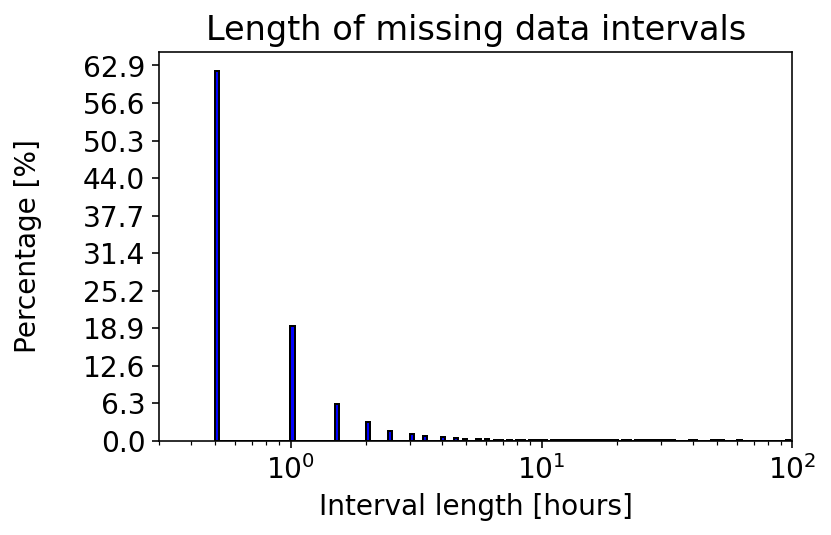

In [313]:
# bins are unequal in width in a way that would make them look equal on a logarithmic scale.
# matplotlib histogram
plt.hist(data, color = 'blue', edgecolor = 'black',bins=10**bins)
plt.gca().set_xscale("log")

plt.title('Length of missing data intervals')
plt.xlabel('Interval length [hours]')
plt.ylabel('Percentage [%]\n')
plt.yticks(ticks=np.arange(0,27500,2500),labels=np.round(100*np.arange(0,27500,2500)/len(data),1))

# plt.ylim(0,1000)
plt.xlim(0,100)
plt.tight_layout()
plt.rcParams.update({'font.size': 14})

# plt.savefig("/Users/iditbela/Documents/Broday/saved_data_from_notebooks/interval_hist.png", dpi=500)

plt.show();

we can see that the majority of missing intervals are between half an hour to 2-3 hours.

# What is the correlation between stations ?

In [ ]:
import seaborn as sns

corrMatrix = r_PM25.corr()

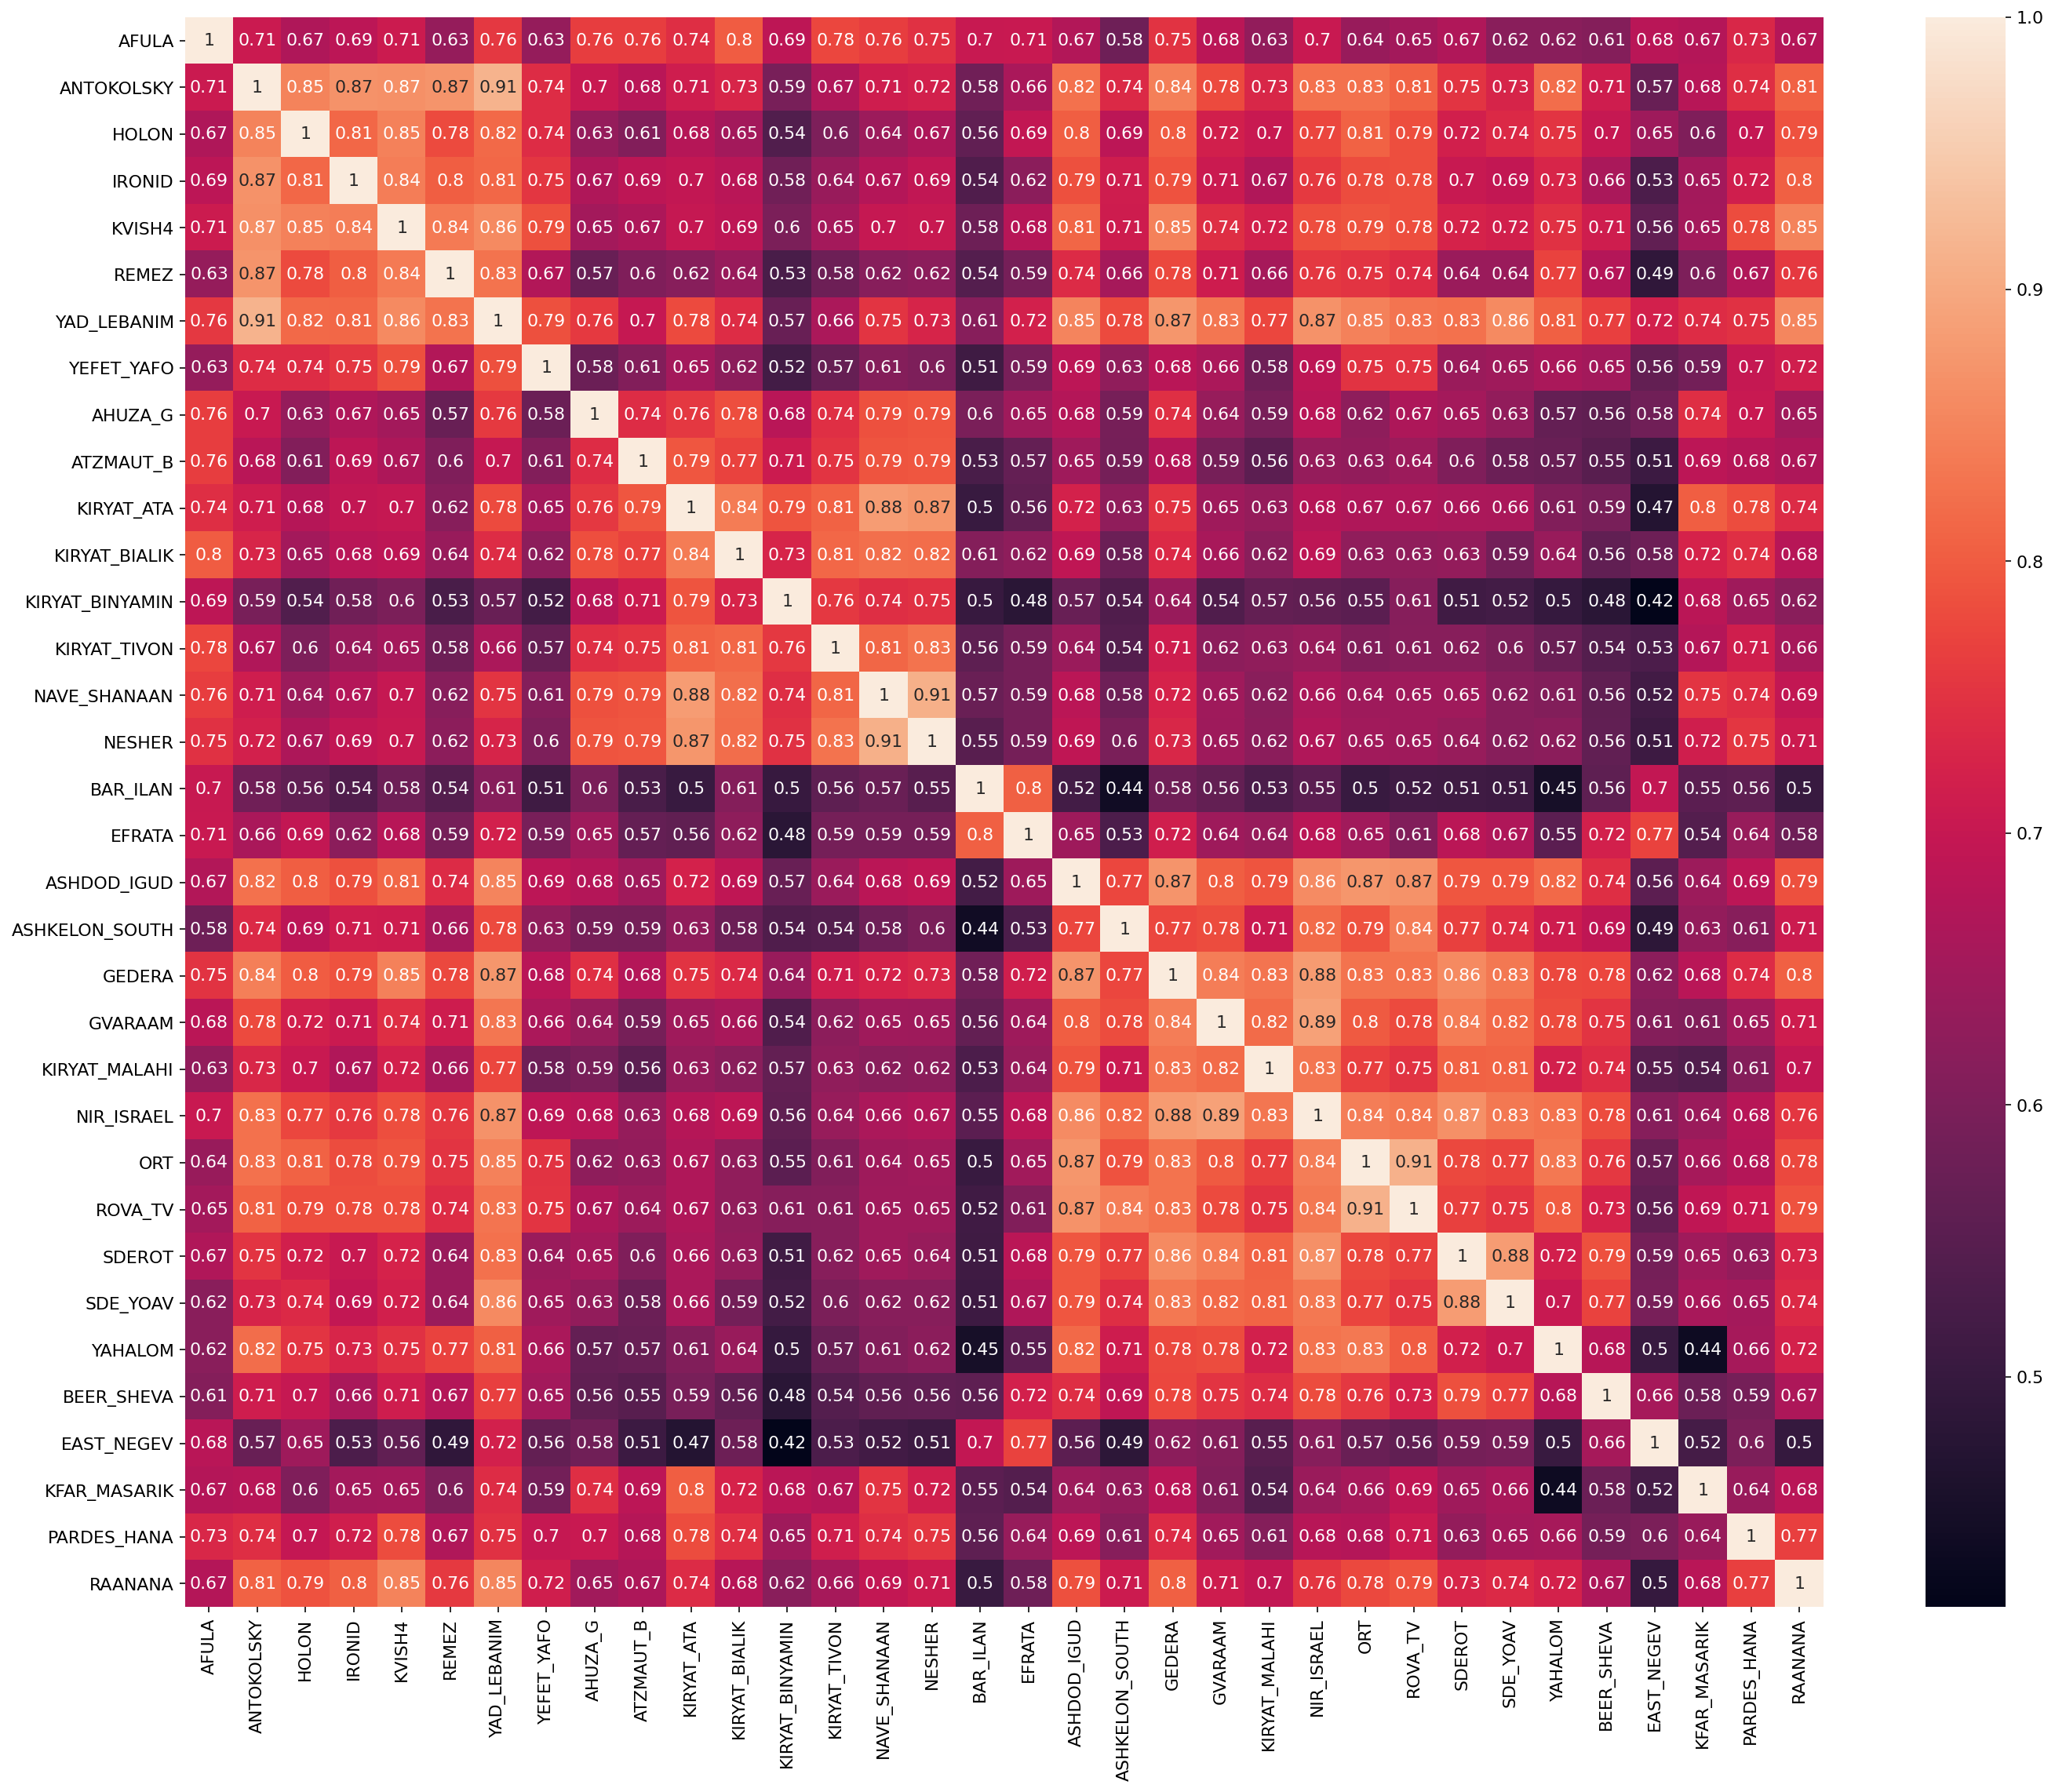

In [321]:
fig, ax = plt.subplots(figsize=(20,16))

sns.heatmap(corrMatrix, annot=True)

plt.rcParams.update({'font.size': 11})
plt.tight_layout()
# plt.savefig("/Users/iditbela/Documents/Broday/saved_data_from_notebooks/correlation_matrix.png", dpi=500)

plt.show();

In [327]:
np.max(corrMatrix[corrMatrix<1].max())

np.min(corrMatrix[corrMatrix<1].min())

0.9132840376748307

0.4153319952242773

In [ ]:
# from pandas.plotting import scatter_matrix

# fig, ax = plt.subplots(figsize=(14,10))
# scatter_matrix(r_PM25)
# plt.show();

In [ ]:
# # Basic correlogram
# sns.pairplot(r_PM25)
# sns.plt.show();


# Look at the data!

### hourly, weekly and monthly averages
12 * 7 * 24

In [328]:
12 * 7 * 24

2016

In [329]:
times.shape
r_PM25.shape

(105167,)

(105167, 34)

In [330]:
times

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 00:30:00',
               '2013-01-01 01:00:00', '2013-01-01 01:30:00',
               '2013-01-01 02:00:00', '2013-01-01 02:30:00',
               '2013-01-01 03:00:00', '2013-01-01 03:30:00',
               '2013-01-01 04:00:00', '2013-01-01 04:30:00',
               ...
               '2018-12-31 18:30:00', '2018-12-31 19:00:00',
               '2018-12-31 19:30:00', '2018-12-31 20:00:00',
               '2018-12-31 20:30:00', '2018-12-31 21:00:00',
               '2018-12-31 21:30:00', '2018-12-31 22:00:00',
               '2018-12-31 22:30:00', '2018-12-31 23:00:00'],
              dtype='datetime64[ns]', length=105167, freq='30T')

In [331]:
r_PM25['datetime'] = pd.to_datetime(times)
# r_PM25['week day'] = pd.to_datetime(times).weekday_name
# r_PM25['month'] = pd.to_datetime(times).month
# r_PM25['hour'] = pd.to_datetime(times).hour
# r_PM25.drop(['week day','month','hour'],axis=1,inplace=True)

In [332]:
r_PM25.head(2)

,AFULA,ANTOKOLSKY,HOLON,IRONID,KVISH4,REMEZ,YAD_LEBANIM,YEFET_YAFO,AHUZA_G,ATZMAUT_B,...,ROVA_TV,SDEROT,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,PARDES_HANA,RAANANA,datetime
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-01 00:00:00
1,NaN,28.2,55.0,46.0,NaN,NaN,23.2,NaN,17.4,33.1,...,30.1,46.9,41.0,36.3,38.8,NaN,13.6,16.4,NaN,2013-01-01 00:30:00


In [333]:
# this can be used for simple imputation:
r_PM25.groupby([r_PM25.datetime.dt.month, r_PM25.datetime.dt.weekday_name, r_PM25.datetime.dt.hour]).mean()

AFULA  ANTOKOLSKY      HOLON     IRONID  \
datetime datetime  datetime                                                
1        Friday    0         31.881395   27.954717  35.912500  30.658333   
                   1         27.378261   30.211111  36.116000  31.579167   
                   2         29.576190   29.554717  37.922449  30.428571   
                   3         26.951111   26.448148  35.753846  30.283673   
                   4         29.251111   26.498148  34.704082  28.418367   
                   5         27.827273   27.727778  34.964000  29.725000   
                   6         28.155556   32.779630  37.837500  33.827660   
                   7         27.045455   32.090741  35.210204  31.151064   
                   8         32.840000   33.364815  30.415094  30.063043   
                   9         34.211628   36.387037  29.406122  30.191489   
                   10        24.236364   33.594444  31.267347  28.336957   
                   11        22.897561   32.490741  34.300000  26.933333   
                   12        20.483333   33.200000  37.378431  32.208333   
                   13        27.980488   33.742593  32.513725  29.861224   
                   14        25.120930   30.187037  31.450000  28.017021   
                   15        20.265116   28.467925  30.461224  32.300000   
                   16        20.765000   24.733333  27.955102  25.228261   
                   17        23.193182   22.924074  25.292308  20.642553   
                   18        21.379070   20.230189  20.108333  19.826087   
                   19        16.744186   18.948148  15.883333  17.864444   
                   20        18.200000   18.188889  18.810204  16.268750   
                   21        20.330233   19.070370  19.254000  19.611765   
                   22        22.025000   18.492593  20.879167  18.172000   
                   23        21.918605   19.122642  22.711364  20.480000   
         Monday    0         28.207143   24.234000  31.114583  32.730000   
                   1         25.355814   22.836538  27.773077  29.948000   
                   2         25.597674   23.835294  28.688462  29.673469   
                   3         25.690909   21.740385  28.124000  29.141176   
                   4         26.044186   22.786275  29.968085  28.969231   
                   5         25.346512   20.586275  27.377551  25.376471   
...                                ...         ...        ...        ...   
12       Tuesday   18        23.615385   17.905660  16.630189  18.336735   
                   19        22.636538   19.924528  18.441176  19.118000   
                   20        24.098077   21.394444  25.151923  23.676000   
                   21        25.510204   23.450000  22.569811  24.244000   
                   22        24.756863   22.574074  23.227451  24.715686   
                   23        24.603846   22.325926  23.615094  23.500000   
         Wednesday 0         23.386000   22.003846  23.704082  24.686000   
                   1         22.054000   22.492308  23.278846  23.464706   
                   2         21.379167   20.544231  18.070588  22.946939   
                   3         22.310417   20.325000  19.775000  24.506122   
                   4         22.908333   18.276923  21.666000  22.996000   
                   5         23.166000   17.676923  22.555102  20.763462   
                   6         21.200000   17.548077  21.934694  20.955769   
                   7         21.480000   18.540385  20.228571  20.364706   
                   8         19.538776   20.980769  18.608333  20.303846   
                   9         18.710638   22.066667  17.292157  18.392000   
                   10        15.288000   21.726000  26.412000  22.533333   
                   11        17.620408   19.668000  26.362000  19.746154   
                   12        18.216327   17.158000  20.315385  20.842000   
                   13        18.072340   17.073469  17.737255  15.948980   
     

### plot interactive boxplots of values per hour (hourly averages dist.,n=no.years*52*24), per day of week (dayly averages dist., n=no.years*52), per month (monthly averages dist., n=no.years)

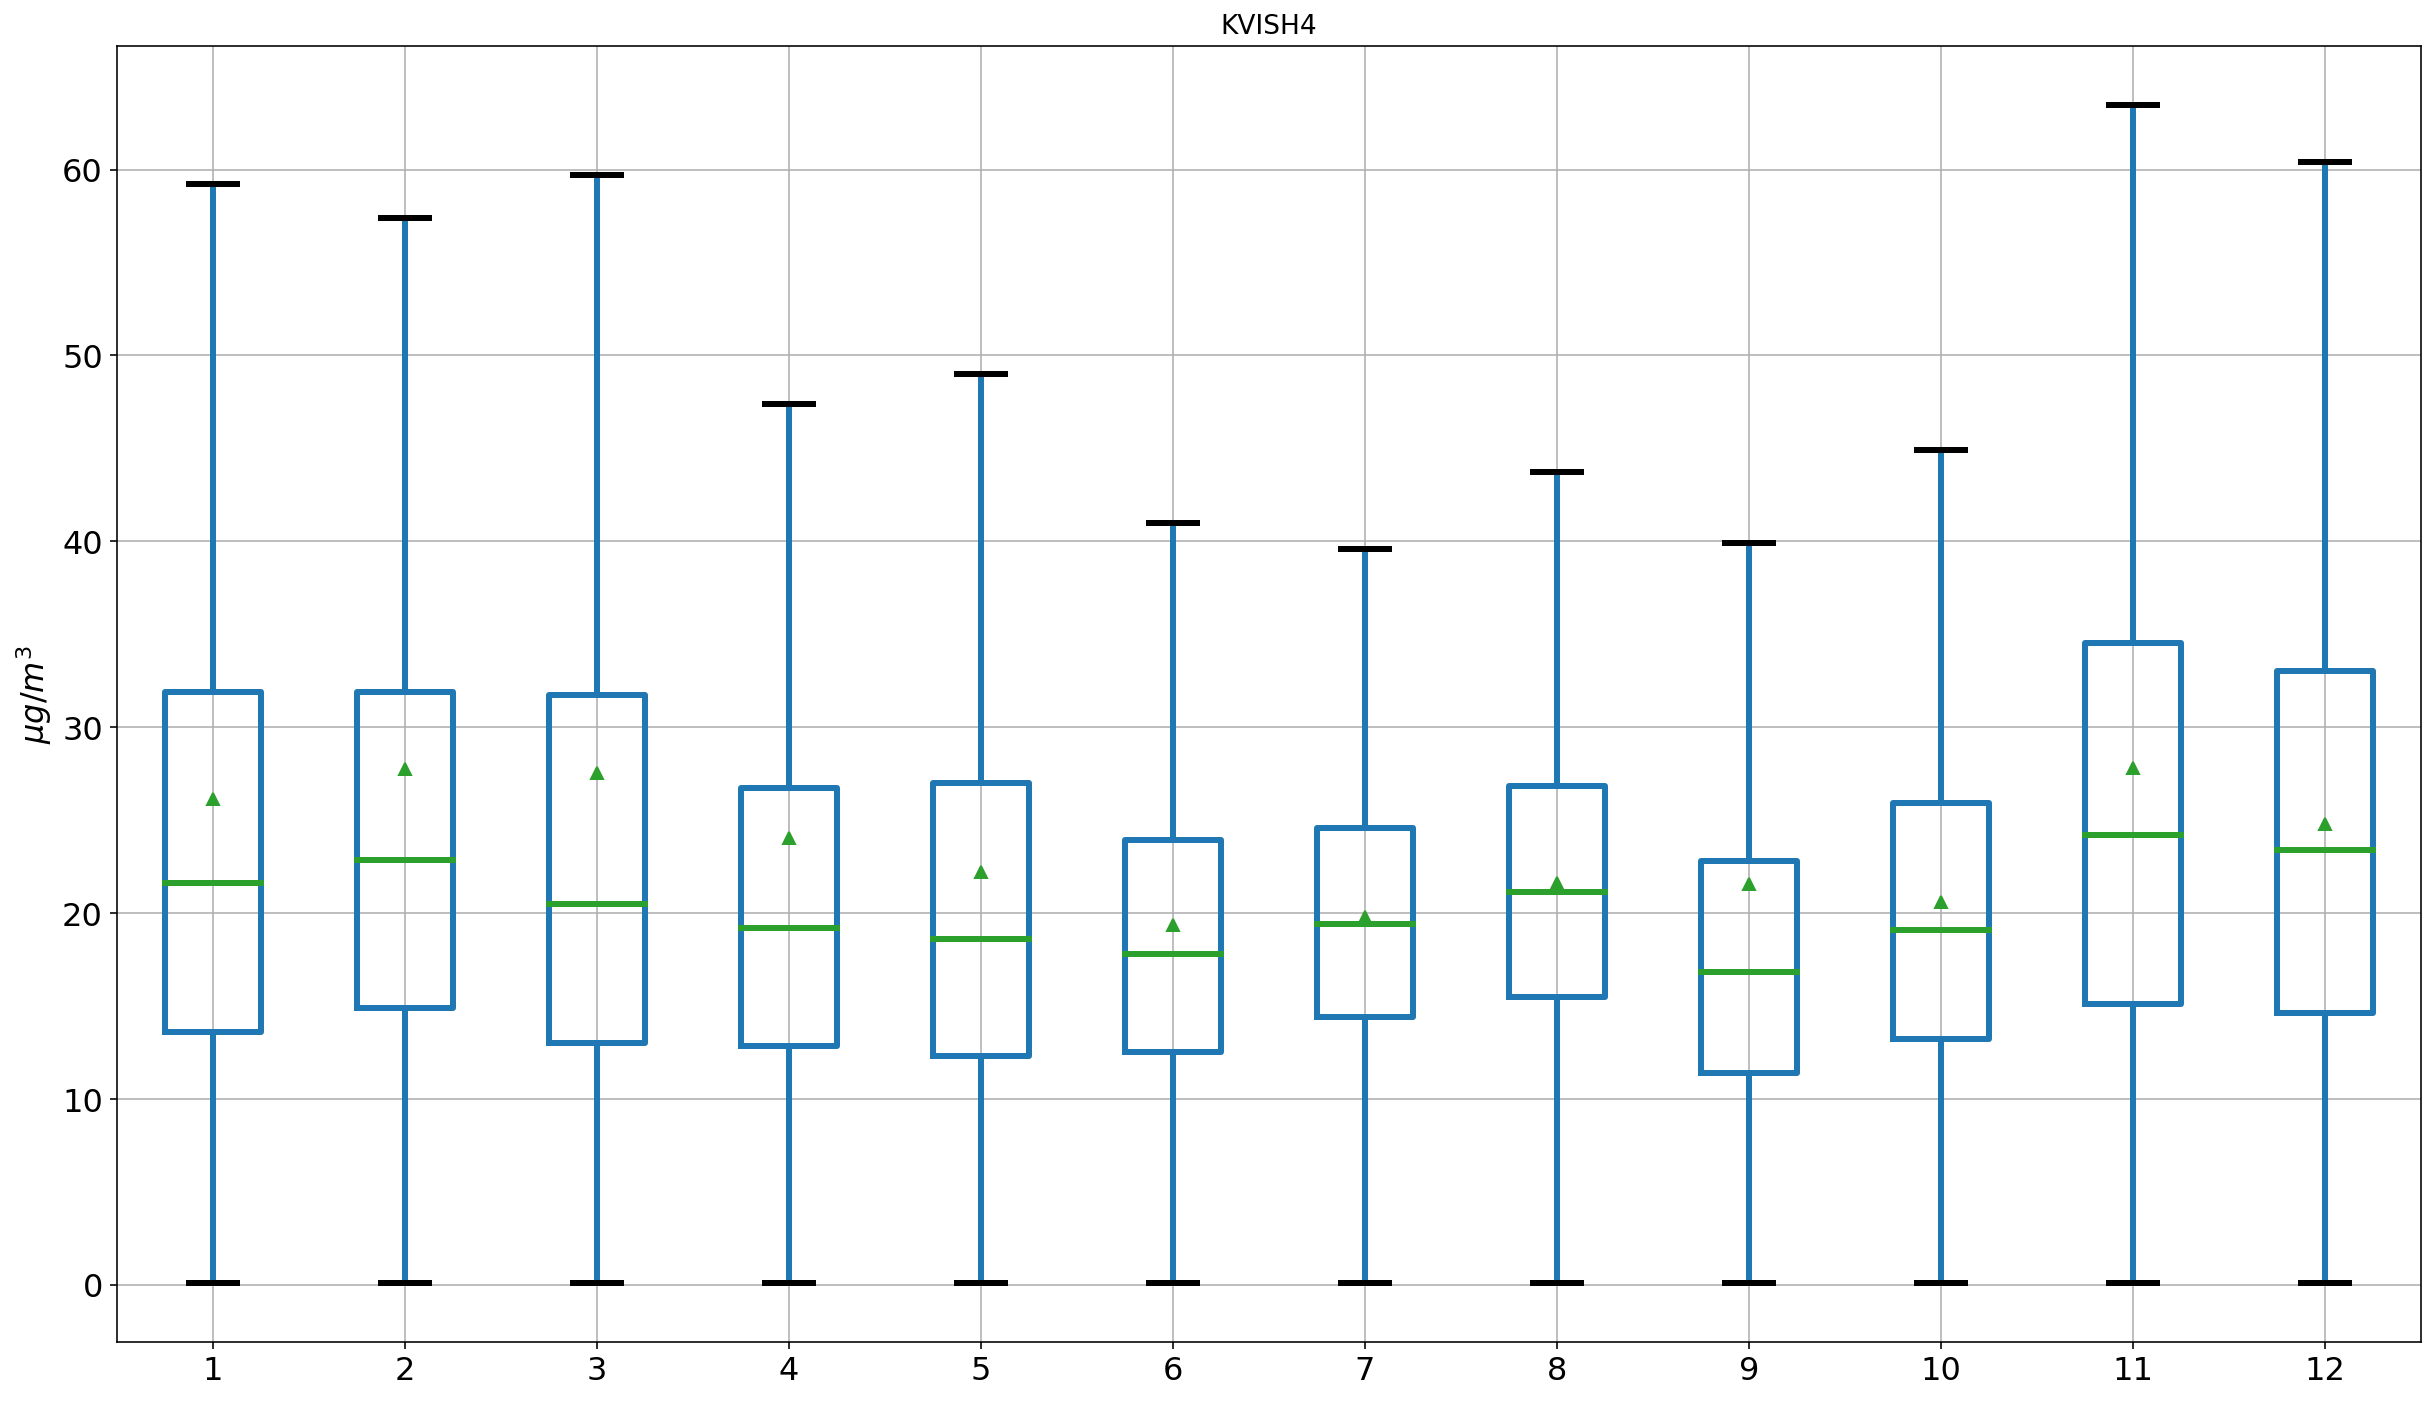

In [334]:
fig, ax = plt.subplots(figsize=(20,12))

bp = r_PM25.boxplot(column=['KVISH4'], by=r_PM25.datetime.dt.month, ax=ax, fontsize=16,
                    showfliers=False, showmeans=True,return_type='dict')

[[item.set_linewidth(3) for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['means']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['caps']] for key in bp.keys()]

# title_boxplot = 'awesome title'
# plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
# plt.ylim([0,40])
ax.set_xlabel('')
ax.set_ylabel('$\mu g/m^3$',fontsize=16)
plt.show();

In [335]:
# chosen_data = r_PM25.groupby([r_PM25.datetime.dt.weekday_name]).mean()

# cats = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
# chosen_data = chosen_data.set_index(chosen_data.index).reindex(cats).reset_index()

# chosen_data

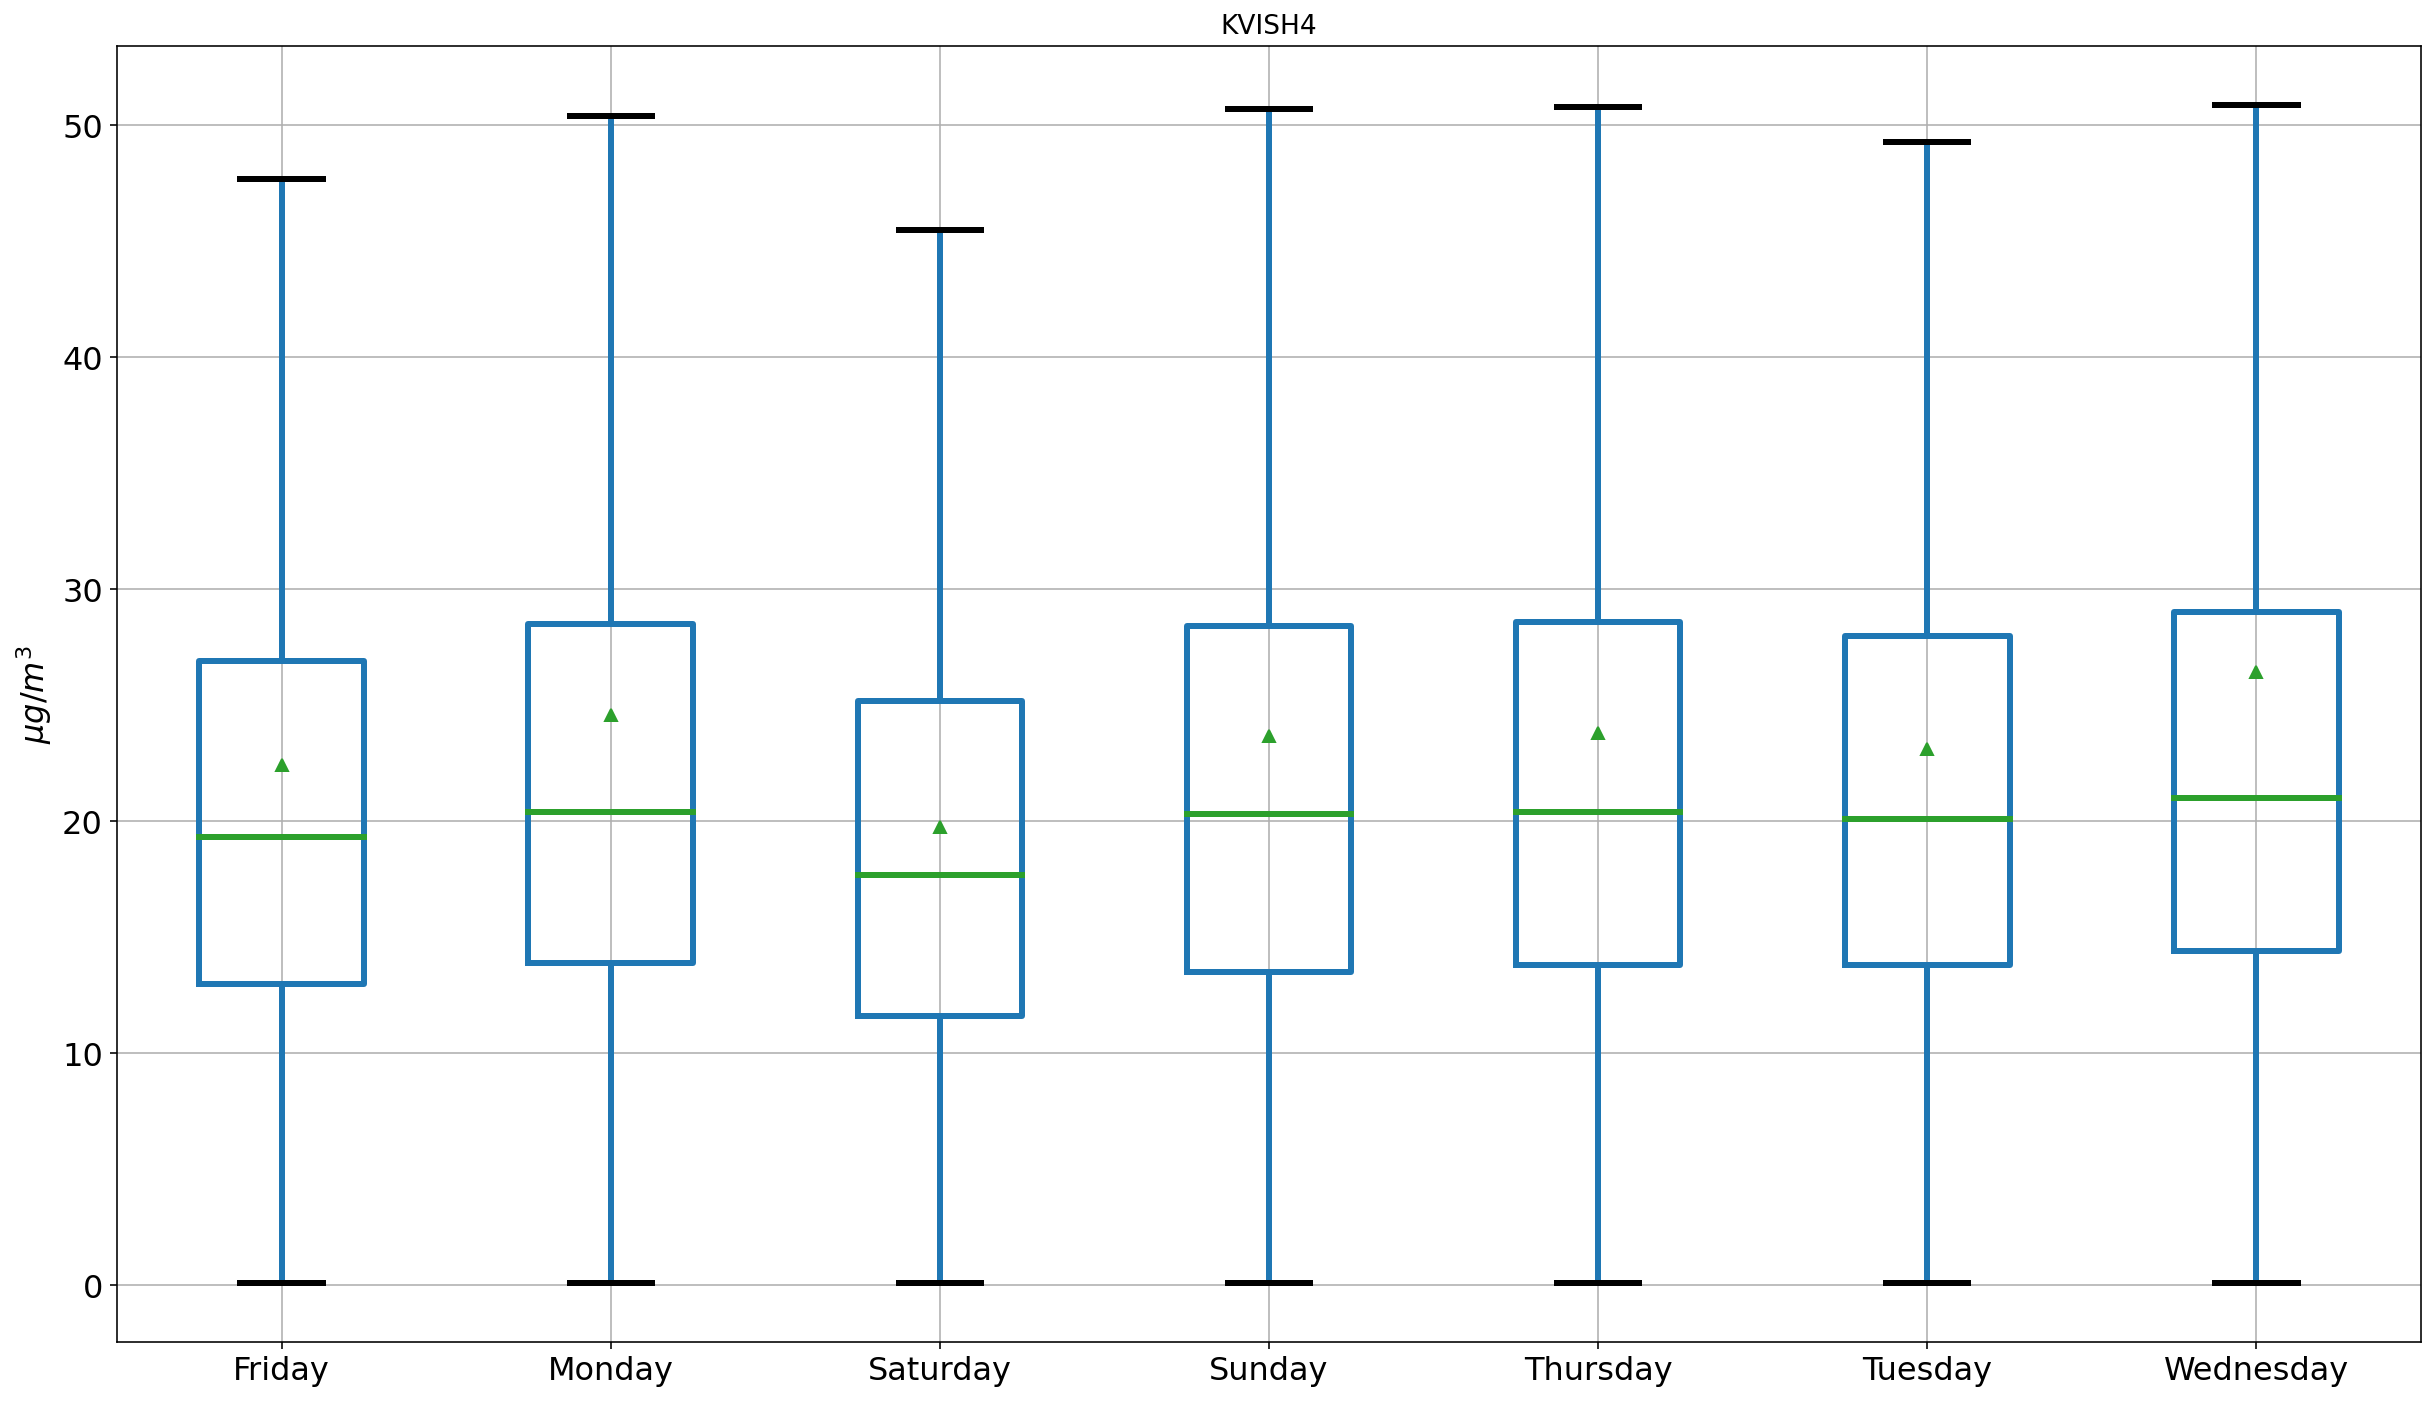

In [336]:
fig, ax = plt.subplots(figsize=(20,12))

  
bp = r_PM25.boxplot(column=['KVISH4'], by=r_PM25.datetime.dt.weekday_name, ax=ax, fontsize=16,
                    showfliers=False, showmeans=True,return_type='dict')

[[item.set_linewidth(3) for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['means']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['caps']] for key in bp.keys()]

# title_boxplot = 'awesome title'
# plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
# plt.ylim([0,40])
ax.set_xlabel('')
ax.set_ylabel('$\mu g/m^3$',fontsize=16)
plt.show();

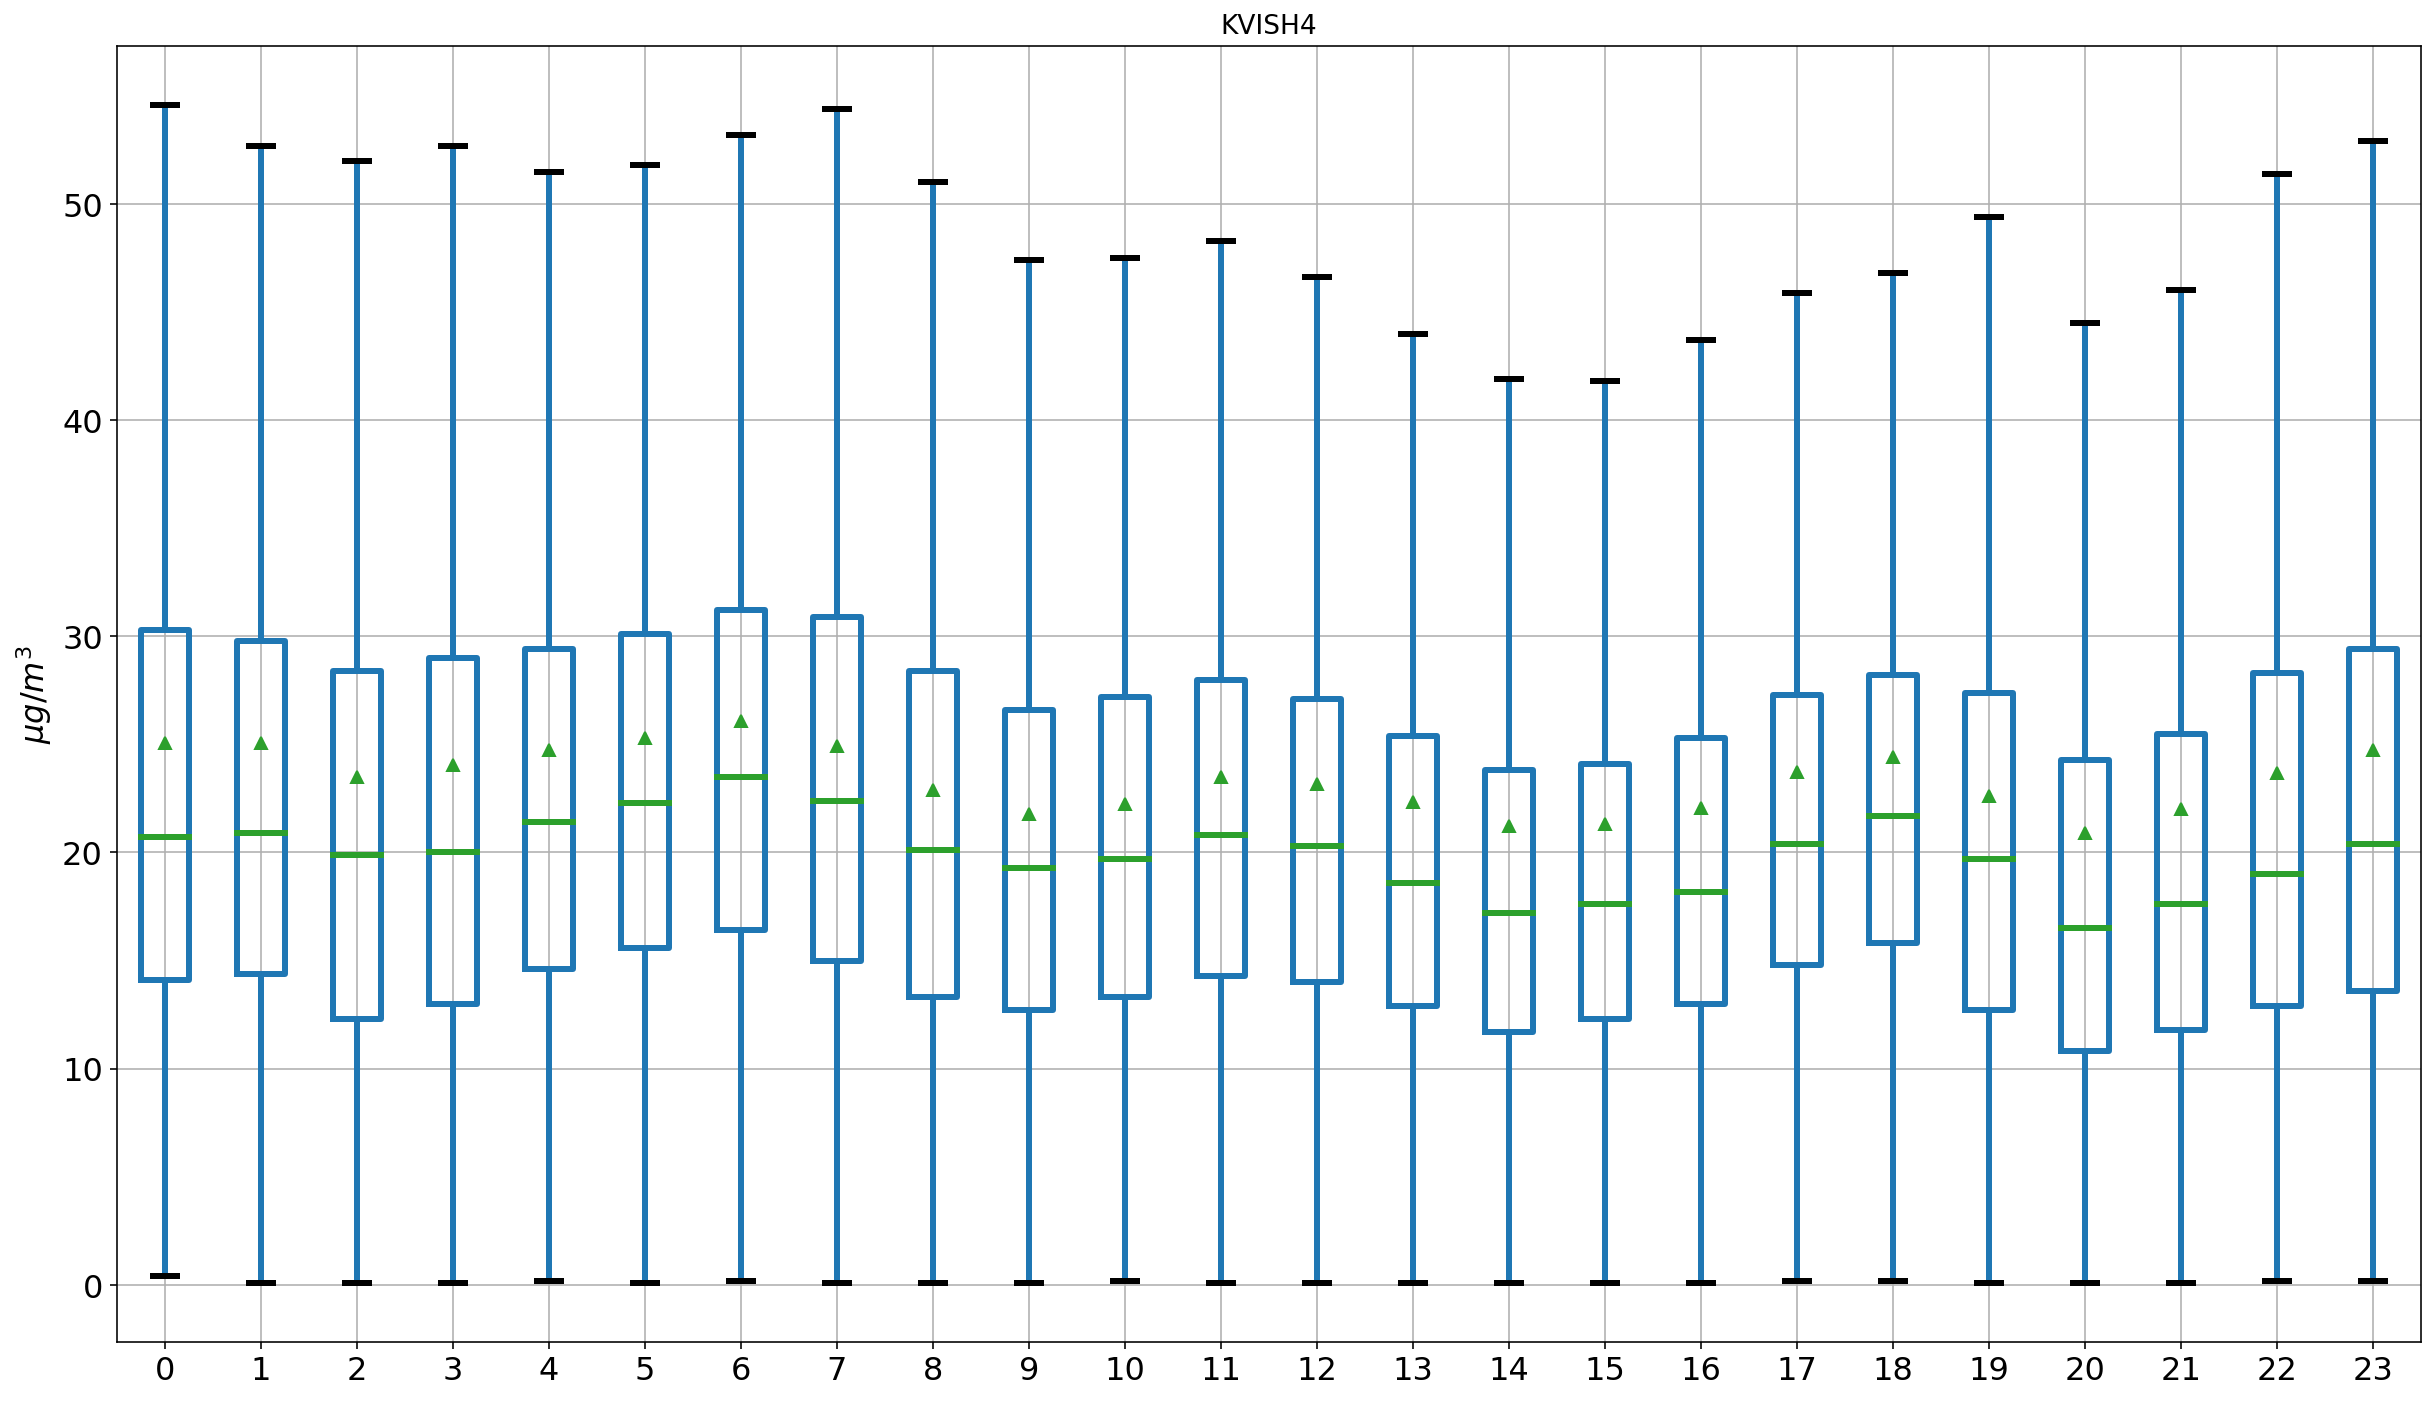

In [337]:
fig, ax = plt.subplots(figsize=(20,12))

bp = r_PM25.boxplot(column=['KVISH4'], by=r_PM25.datetime.dt.hour, ax=ax, fontsize=16,
                    showfliers=False, showmeans=True,return_type='dict')

[[item.set_linewidth(3) for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['means']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_linewidth(3) for item in bp[key]['caps']] for key in bp.keys()]

# title_boxplot = 'awesome title'
# plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
# plt.ylim([0,40])
ax.set_xlabel('')
ax.set_ylabel('$\mu g/m^3$',fontsize=16)
plt.show();

In [338]:
import random

number_of_colors = r_PM25.shape[1]

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

In [346]:
cats = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
# cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

In [347]:
# set extra colors in case more pollutants are measured in a station:
# colors = ['#FFD700','firebrick','LightSkyBlue','#8B008B','blue','turquoise','DarkSlateGrey','fuchsia','#8B4513','#2ca02c','#ff7f0e','#BC8F8F']

color_lines = dict()
for col, c in zip(r_PM25.columns, colors[0:len(r_PM25.columns)+1]):
    color_lines[col] = c

In [348]:
import warnings
warnings.filterwarnings("ignore")

In [349]:
layout = go.Layout(
    width = 800,
    height = 400,
    title={
        'text': "Choose a station and averaging time",
        'y':0.9,
        'x':0.5,
        'xanchor': 'right',
        'yanchor': 'top'},
    yaxis = dict(
        title = '$\mu g/m^3$ '
    ),
    xaxis = dict(
        title = 'Averging period'
    ),
    plot_bgcolor='rgb(255,255,250)'
#     paper_bgcolor = 'rgba(0,0,0,0)',
#     plot_bgcolor = 'rgba(0,0,0,0)'
)

def update_plot(avg,Stations):   
#     avg = month, weekday_name,hour
#     data = [] #empty list where all my traces are in
    fig = go.Figure(layout=layout)
    
    for s in Stations: # signals are the items in the multiselect widget       
        chosen_data = r_PM25.groupby([r_PM25.datetime.apply(lambda x : getattr(x, avg))]).mean()  

        if avg == 'weekday_name':
            chosen_data = chosen_data.set_index(chosen_data.index).reindex(cats).reset_index()
            x=chosen_data.datetime
        else:            
            x = chosen_data.index
        
        # updaing averages
        fig.add_trace(go.Scatter(
            x=x,
            y=chosen_data[s],
            mode = 'lines',#lines/markers
            name = '{}\n{}'.format(s,avg),
            line = dict(width=2,color=color_lines[s]),
            showlegend = True
        ))   
        
    py.offline.iplot(fig) # when using notebook

i = widgets.interact(update_plot,
             avg = widgets.RadioButtons(options=list(['month', 'weekday_name', 'hour']),value=('weekday_name'),description='Averaging'), 
             Stations = widgets.SelectMultiple(options=list(r_PM25.columns[:-1]),value=('KVISH4','AFULA'))
             )


interactive(children=(RadioButtons(description='Averaging', index=1, options=('month', 'weekday_name', 'hour'), value='weekday_name'), SelectMultiple(description='Stations', index=(4, 0), options=('AFULA', 'ANTOKOLSKY', 'HOLON', 'IRONID', 'KVISH4', 'REMEZ', 'YAD_LEBANIM', 'YEFET_YAFO', 'AHUZA_G', 'ATZMAUT_B', 'KIRYAT_ATA', 'KIRYAT_BIALIK', 'KIRYAT_BINYAMIN', 'KIRYAT_TIVON', 'NAVE_SHANAAN', 'NESHER', 'BAR_ILAN', 'EFRATA', 'ASHDOD_IGUD', 'ASHKELON_SOUTH', 'GEDERA', 'GVARAAM', 'KIRYAT_MALAHI', 'NIR_ISRAEL', 'ORT', 'ROVA_TV', 'SDEROT', 'SDE_YOAV', 'YAHALOM', 'BEER_SHEVA', 'EAST_NEGEV', 'KFAR_MASARIK', 'PARDES_HANA', 'RAANANA'), value=('KVISH4', 'AFULA')), Output()), _dom_classes=('widget-interact',))

### interactively original time-series (to spot outliers and see missing values) - moving average on a weekly and monthly window, per station... would be cool to add later the imputed data marked in other color to see if the imputation looks reasonable. 

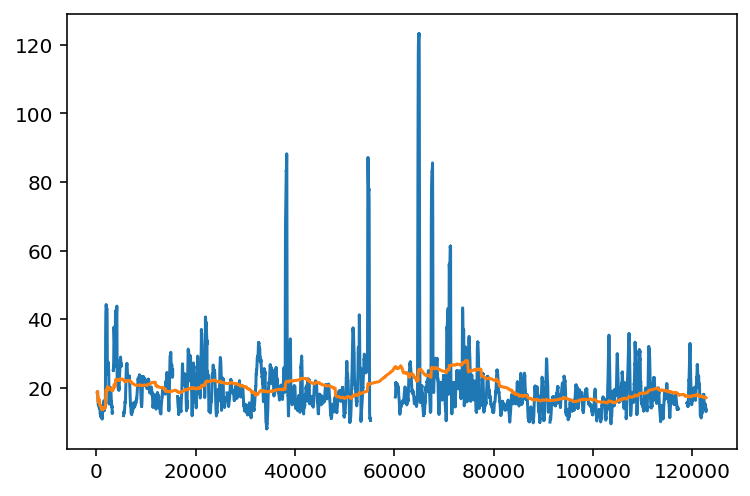

In [66]:
plt.plot(r_PM25.iloc[:,1].rolling(window=(2*24*7),min_periods=24*7).mean()) #weekly
plt.plot(r_PM25.iloc[:,1].rolling(window=(2*24*7*30),min_periods=24*7).mean()) #monthly

## Check verious methods for data imputation

In [67]:
# https://towardsdatascience.com/facing-the-arima-model-against-neural-networks-745ba5a933ca
# https://towardsdatascience.com/playing-with-time-series-data-in-python-959e2485bff8
# https://towardsdatascience.com/forecasting-with-prophet-d50bbfe95f91
# https://medium.com/@drnesr/filling-gaps-of-a-time-series-using-python-d4bfddd8c460
# https://github.com/KlickInc/datasci-strata-talk-missing-data/blob/master/Strata%20Data%20Conference%20New%20York%202019_FINAL.pdf
# https://stackoverflow.com/questions/57419021/filling-huge-large-chunks-of-time-series-data
# looks good - 
# https://medium.com/analytics-vidhya/using-scikit-learns-iterative-imputer-694c3cca34de

# libraries
# https://pypi.org/project/fancyimpute/
# looks the most interesting - 
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

# examples
# https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py
# https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#sphx-glr-auto-examples-impute-plot-iterative-imputer-variants-comparison-py

In [66]:
# Data-driven methods (using TIME-SERIES FORCASTING). 
# sometimes called univariate imputation: "One type of imputation algorithm is
# univariate, which imputes values in the i-th feature dimension using only non-missing
# values in that feature dimension (e.g. impute.SimpleImputer)."

# By contrast, multivariate imputation algorithms use the entire set of available 
# feature dimensions to estimate the missing values (e.g. impute.IterativeImputer).

# ARIMA - takes into consideration...? 
# Prophet - takes into cosideration seasonality and trend
# LSTM (ANN?)

# interpolation-like (data-driven)
# EM-?
# KNN-?
# moving average (rolling)
# mean (simple imputer or fillna pandas)

# Regression (maybe called multivariate imputation?)
# forcast by the values in other stations.
# Random forest for example

# Clustering - take the hour of the day, and the day of the year and cluster to groups. 
# then maybe give the average value where is it missing according to the group. ?

# Evaluation matrics - MAE, RMSE, R^2, rank product = geometric mean of the all evaluation values
# compare to random
# ensamble - take mean value(?) of top performing methods. 

In [67]:
# SUMMARY

# long periods (over several hours) - univariate-ARIMA, Prophet, LSTM,  multivariate-regression like (sklearn)
# problem might arrise with the long missing period *at the begining* of time (before station started to operate). 
# for this maybe only the multivariate is appropriate. Not sure. 
# short periods - everything is good... 
# Evaluation matrics - MAE, RMSE, R^2, rank product = geometric mean of the all evaluation values
# compare to random
# ensamble - take mean value(?) of top performing methods. 
# uncertainty - "IterativeImputer can also be used for multiple imputations by 
# applying it repeatedly to the same dataset with different random seeds when 
# sample_posterior=True."

# understanding - 
# I need to take from each time-series of each station, the non-missing data I have. 
# I NEED TO MAKE SURE MY DATA IS NORMALLY DISTRIBUTED. MIGHT BE JUST DUE TO THE SIZE OF THE DATASET...
# then, I need to randomly take chunks of data and report it as missing 
# (based on the distribution of missing interval sizes?)- 
# technically I can randomly choose X time points (from a poisson dist. or - the distance between start of missing intervals is exp. dist.)
# and then randomly choose interval length. however, I might have a problem with overlapping. 
# one solution - interate until I don't have an overlap. 
# other solution - both missing intervals and data intervals are geometric dist.
# write a function that randomly builds simultanously the missing and non-missing. 
# (based on the probability of that station to be missing?)
# I should probably assign for each station the size of missing chunks based on 
# the real size of missing chunks of that station - NOT SURE IT MATTERS.
# I then train all kinds of models (regression (multivariate) or univariate) 
# and evaluate their performance based on predicting the dummy missing values.
# I can do 10 fold cross-validation. 
# I think it must also predict the real missing values simultanously, but the 
# evaluation would be based only on the dummy ones of course. 
# I should try and add the day in the year, the day in the week and time of day as features.


# Multivariate-regression like (sklearn)

In [68]:
# start with trying to impute missing values in one station based on other stations
# later possibly add meteorological data 
# 105167 entries, each with 35 features. 

In [68]:
# IterativeImputer - Iterative imputation of the missing values.
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer

'''This uses round-robin linear regression, modeling each feature with missing 
values as a function of other features, in turn. The version implemented assumes 
Gaussian (output) variables. If your features are obviously non-normal, consider 
transforming them to look more normal to potentially improve performance.'''

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.impute import MissingIndicator

'This uses round-robin linear regression, modeling each feature with missing \nvalues as a function of other features, in turn. The version implemented assumes \nGaussian (output) variables. If your features are obviously non-normal, consider \ntransforming them to look more normal to potentially improve performance.'

In [69]:
# reduced PM25 - starting later than 2000 at the moment...
r_PM25 = PM25[start_year:]
idx = r_PM25.notnull().sum(axis = 0)/r_PM25.shape[0]>thr
r_PM25 = r_PM25.loc[:, idx]

In [70]:
r_PM25.reset_index(inplace=True)
r_PM25.drop(labels = 'index',axis=1, inplace=True)
# r_PM25.drop(labels = 'datetime',axis=1, inplace=True)

In [71]:
r_PM25_withDays = r_PM25.copy()

In [72]:
# r_PM25['datetime'] = pd.to_datetime(times)
r_PM25_withDays['week day'] = pd.to_datetime(times).dayofweek
r_PM25_withDays['month'] = pd.to_datetime(times).month
r_PM25_withDays['hour'] = pd.to_datetime(times).hour
# r_PM25.drop(['week day','month','hour'],axis=1,inplace=True)

In [96]:
r_PM25.head(5)
r_PM25.shape
r_PM25_withDays.head(5)
r_PM25_withDays.shape

,AFULA,ANTOKOLSKY,HOLON,IRONID,KVISH4,PETAH_TIKVA_ROAD,REMEZ,YAD_LEBANIM,YEFET_YAFO,AHUZA_G,...,ORT,ROVA_TV,SDEROT,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,PARDES_HANA,RAANANA
0,NaN,12.1,17.0,14.7,18.1,NaN,18.0,12.7,NaN,11.6,...,9.2,19.7,7.8,11.8,51.6,33.1,13.0,32.6,12.7,NaN
1,NaN,11.4,NaN,11.9,19.0,NaN,18.0,11.1,NaN,9.7,...,NaN,8.2,11.5,14.1,NaN,23.5,13.0,34.1,12.3,NaN
2,NaN,11.6,NaN,12.4,19.0,NaN,18.0,11.3,NaN,9.5,...,NaN,5.9,16.8,5.0,NaN,22.1,13.0,32.4,11.4,NaN
3,NaN,12.3,NaN,11.7,19.0,NaN,18.0,11.8,NaN,10.1,...,NaN,9.1,15.0,2.0,NaN,26.2,13.0,26.8,10.6,NaN
4,NaN,11.4,NaN,12.5,19.0,NaN,18.0,10.9,NaN,11.8,...,NaN,8.5,13.0,40.6,NaN,26.2,13.0,19.4,10.6,NaN


(122735, 35)

,AFULA,ANTOKOLSKY,HOLON,IRONID,KVISH4,PETAH_TIKVA_ROAD,REMEZ,YAD_LEBANIM,YEFET_YAFO,AHUZA_G,...,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,PARDES_HANA,RAANANA,week day,month,hour
0,NaN,12.1,17.0,14.7,18.1,NaN,18.0,12.7,NaN,11.6,...,11.8,51.6,33.1,13.0,32.6,12.7,NaN,6,1,0
1,NaN,11.4,NaN,11.9,19.0,NaN,18.0,11.1,NaN,9.7,...,14.1,NaN,23.5,13.0,34.1,12.3,NaN,6,1,0
2,NaN,11.6,NaN,12.4,19.0,NaN,18.0,11.3,NaN,9.5,...,5.0,NaN,22.1,13.0,32.4,11.4,NaN,6,1,1
3,NaN,12.3,NaN,11.7,19.0,NaN,18.0,11.8,NaN,10.1,...,2.0,NaN,26.2,13.0,26.8,10.6,NaN,6,1,1
4,NaN,11.4,NaN,12.5,19.0,NaN,18.0,10.9,NaN,11.8,...,40.6,NaN,26.2,13.0,19.4,10.6,NaN,6,1,2


(122735, 38)

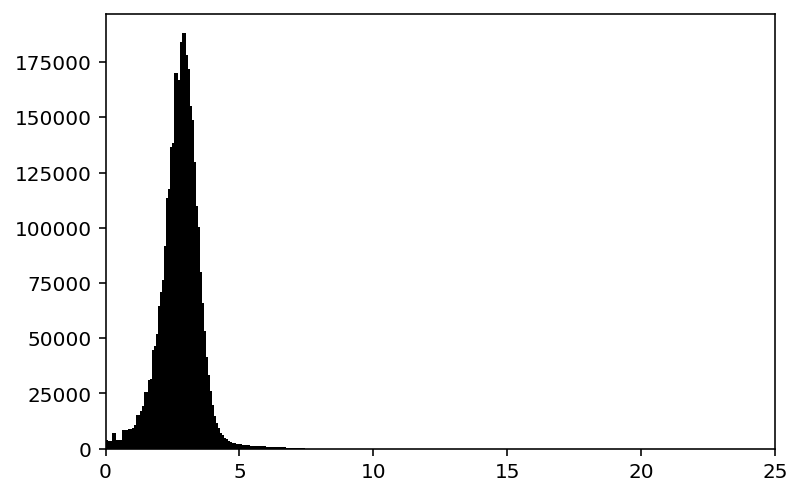

In [74]:
# check for Normality
# https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93
check = r_PM25.values
check = check[(~np.isnan(check))]+0.0000000000001 # because of the zeros

plt.hist(np.log(check),color = 'blue', edgecolor = 'black',bins=500)
plt.xlim([0,25])
plt.show();

looks like the data is log-normally distributed

In [75]:
# perform a box-cox transformation for the data to obtain normally-distributed features. 

In [76]:
from sklearn.preprocessing import PowerTransformer

In [77]:
# change X_missing to normal_data
pt = PowerTransformer(method='box-cox')
t_data = r_PM25.values+1
pt.fit(t_data)

# by default applies seperately to each column
normal_data = pd.DataFrame(
    pt.transform(t_data),
    index=r_PM25.index,
    columns=r_PM25.columns)

PowerTransformer(method='box-cox')

In [78]:
normal_data.head()

,AFULA,ANTOKOLSKY,HOLON,IRONID,KVISH4,PETAH_TIKVA_ROAD,REMEZ,YAD_LEBANIM,YEFET_YAFO,AHUZA_G,...,ORT,ROVA_TV,SDEROT,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,PARDES_HANA,RAANANA
0,NaN,-0.542199,0.046052,-0.232653,-0.118948,NaN,-0.08491,-0.420187,NaN,-0.283961,...,-0.783871,0.261704,-1.070721,-0.292115,1.702612,1.030699,-0.297776,0.976301,-0.540324,NaN
1,NaN,-0.651318,NaN,-0.527839,-0.046765,NaN,-0.08491,-0.618733,NaN,-0.548467,...,NaN,-0.894665,-0.541055,-0.096960,NaN,0.495517,-0.297776,1.054751,-0.592063,NaN
2,NaN,-0.619445,NaN,-0.471072,-0.046765,NaN,-0.08491,-0.592588,NaN,-0.578930,...,NaN,-1.277149,0.002983,-1.114881,NaN,0.400806,-0.297776,0.965631,-0.714307,NaN
3,NaN,-0.512228,NaN,-0.551112,-0.046765,NaN,-0.08491,-0.528960,NaN,-0.489170,...,NaN,-0.767549,-0.162238,-1.773645,NaN,0.664190,-0.297776,0.643745,-0.830531,NaN
4,NaN,-0.651318,NaN,-0.459952,-0.046765,NaN,-0.08491,-0.645294,NaN,-0.258418,...,NaN,-0.851131,-0.367797,1.238434,NaN,0.664190,-0.297776,0.126895,-0.830531,NaN


In [80]:
# inverse_normal_data = pd.DataFrame(
#     pt.inverse_transform(normal_data.values)-0.0000000000001,
#     index=normal_data.index,
#     columns=normal_data.columns)


# inverse_normal_data.head(1)

In [79]:
# choose NORMAL or NOT
# mask all missing values
indicator = MissingIndicator(missing_values=np.nan)
# mask_missing_values_original = indicator.fit_transform(normal_data)
mask_missing_values_original = indicator.fit_transform(r_PM25)
mask_missing_values_original
mask_missing_values_original.shape

array([[ True, False, False, ..., False, False,  True],
       [ True, False,  True, ..., False, False,  True],
       [ True, False,  True, ..., False, False,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

(122735, 35)

In [80]:
# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [81]:
rng = np.random.RandomState(0)

In [82]:
def generate_missing_values_for_all_stations(PM25,per):
    # per is the percentage of missing values per 1 station, later would be a vector
    # of percentages. 
    # n_features is the number of stations
    n_samples, n_features = PM25.shape
    X_missing = PM25.copy()
    
    # Add missing values in per% of the lines (a line is 1 station, all timesteps)
    # this is just the average, maybe later I should do it seperately for each station
    missing_rate = per
    
    for f in range(n_features): # for each station       
        n_missing_samples = int(n_samples * missing_rate)
        missing_samples = np.zeros(n_samples, dtype=np.bool)
        missing_samples[: n_missing_samples] = True
        rng.shuffle(missing_samples)
        X_missing.iloc[missing_samples,f] = np.nan
    
    return X_missing

In [83]:
# choose NORMAL or NOT
# normal data
# X_missing = generate_missing_values_for_all_stations(normal_data,0.2)
# original data
X_missing = generate_missing_values_for_all_stations(r_PM25,0.2)

In [84]:
mask_missing_values_all = indicator.fit_transform(X_missing)
mask_missing_values_all
mask_missing_values_all.shape

array([[ True, False, False, ..., False, False,  True],
       [ True, False,  True, ..., False, False,  True],
       [ True, False,  True, ..., False, False,  True],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False,  True, False, ...,  True,  True, False]])

(122735, 35)

In [85]:
X_missing['week day']=r_PM25_withDays['week day']
X_missing['hour']=r_PM25_withDays['hour']
X_missing['month']=r_PM25_withDays['month']

In [86]:
# true = nan
a = mask_missing_values_original # here I want false = not nan
b = mask_missing_values_all # here I want true = nan

In [87]:
(~a) & (b)
~a
b

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False,  True, False, ...,  True,  True, False]])

array([[False,  True,  True, ...,  True,  True, False],
       [False,  True, False, ...,  True,  True, False],
       [False,  True, False, ...,  True,  True, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

array([[ True, False, False, ..., False, False,  True],
       [ True, False,  True, ..., False, False,  True],
       [ True, False,  True, ..., False, False,  True],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False,  True, False, ...,  True,  True, False]])

In [88]:
# y missing should be the diff between the original missing and the new generated missing
mask = ((~a) & (b))
# y_missing = normal_data.mask(~mask)# for validation 
y_missing = r_PM25.mask(~mask)# for validation 

In [89]:
y_missing.shape
X_missing.shape

(122735, 35)

(122735, 38)

In [90]:
# percentage for validation from a complete dataset
(np.sum(np.sum(~y_missing.isnull())))/(105167*35)

# percentage for validation from the non-missing data
(np.sum(np.sum(~y_missing.isnull())))/(np.sum(np.sum(~mask_missing_values_original)))

0.18966134134960858

0.19982917109625328

In [91]:
y_missing.head(1)

,AFULA,ANTOKOLSKY,HOLON,IRONID,KVISH4,PETAH_TIKVA_ROAD,REMEZ,YAD_LEBANIM,YEFET_YAFO,AHUZA_G,...,ORT,ROVA_TV,SDEROT,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,PARDES_HANA,RAANANA
0,NaN,NaN,NaN,14.7,18.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11.8,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
X_missing.head(1)

,AFULA,ANTOKOLSKY,HOLON,IRONID,KVISH4,PETAH_TIKVA_ROAD,REMEZ,YAD_LEBANIM,YEFET_YAFO,AHUZA_G,...,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,PARDES_HANA,RAANANA,week day,hour,month
0,NaN,12.1,17.0,NaN,NaN,NaN,18.0,12.7,NaN,11.6,...,NaN,51.6,33.1,13.0,32.6,12.7,NaN,6,0,1


In [93]:
# X_missing.drop(['week day','hour','month'],axis = 1, inplace=True)

In [95]:
# example of fitting and calculating scores
imp = IterativeImputer(max_iter=3,estimator=ExtraTreesRegressor(n_estimators=10,random_state=0),verbose=True) 
# imp = IterativeImputer(estimator=KNeighborsRegressor(),max_iter=20,verbose=True) 
imp.fit(X_missing) # fit based on the data

[IterativeImputer] Completing matrix with shape (122735, 38)
[IterativeImputer] Change: 8375.012240817454, scaled tolerance: 1.6975 
[IterativeImputer] Change: 1760.0400000000002, scaled tolerance: 1.6975 
[IterativeImputer] Change: 782.9700000000005, scaled tolerance: 1.6975 
[IterativeImputer] Change: 900.24, scaled tolerance: 1.6975 
[IterativeImputer] Change: 842.9499999999999, scaled tolerance: 1.6975 
[IterativeImputer] Change: 894.5100000000001, scaled tolerance: 1.6975 


IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
                 max_iter=6, verbose=True)

In [97]:
imputed_df = imp.transform(X_missing) # impute it
imputed_df = pd.DataFrame(imputed_df, columns=X_missing.columns) #turn it from IterativeImputer object to a dataframe

[IterativeImputer] Completing matrix with shape (122735, 38)


In [98]:
# remove after...somehow like that:
imputed_df.drop(['week day','hour','month'],axis = 1, inplace=True)

In [99]:
# inverse_imputed_df = pd.DataFrame(
#     pt.inverse_transform(imputed_df.values)-1,
#     index=imputed_df.index,
#     columns=imputed_df.columns)

In [100]:
# inverse_imputed_df.mask(~mask).head()

In [101]:
# inverse_y_missing = pd.DataFrame(
#     pt.inverse_transform(y_missing.values)-1,
#     index=y_missing.index,
#     columns=y_missing.columns)

In [102]:
# inverse_y_missing.head()

In [103]:
# Evaluation matrics - MAE, RMSE, R^2, rank product = geometric mean of the all evaluation values

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# y_train = inverse_y_missing.values
y_train = y_missing.values

# y_pred = inverse_imputed_df.mask(~mask).values
y_pred = imputed_df.mask(~mask).values

# take only the not nan in the y_pred if I get not the same size of train and pred
y_train = y_train[~np.isnan(y_train)] 
y_pred = y_pred[~np.isnan(y_pred)]

In [105]:
y_train.shape
y_pred.shape

(698114,)

(698114,)

In [106]:
# without days... 0.75
# RMSE
np.sqrt(mean_squared_error(y_train, y_pred))
# MAE - median absolute error
median_absolute_error(y_train, y_pred)
# MAE - mean absolute error
mean_absolute_error(y_train,y_pred)
# r2
r2_score(y_train,y_pred)

9.901075330888283

4.039999999999999

5.789485084098012

0.8178555820649847

In [107]:
# with days... 0.7915

# RMSE
np.sqrt(mean_squared_error(y_train, y_pred))
# MAE - median absolute error
median_absolute_error(y_train, y_pred)
# MAE - mean absolute error
mean_absolute_error(y_train,y_pred)
# r2
r2_score(y_train,y_pred)

9.901075330888283

4.039999999999999

5.789485084098012

0.8178555820649847

In [98]:
# compare estimators
estimators = [
    ExtraTreesRegressor(n_estimators=10,random_state=0), #n_estimators=number of trees in the forest. by default=100, oob_score=True
    BayesianRidge(),
    DecisionTreeRegressor(random_state=0)

#     KNeighborsRegressor(n_neighbors=5)
]
score_iterative_imputer = pd.DataFrame()

In [399]:
for impute_estimator in estimators:
    imp = IterativeImputer(estimator=impute_estimator,max_iter=5,verbose=True,tol=0.1) 
    imp.fit(normal_data) # fit based on the data
    imputed_df = imp.transform(normal_data) # impute it
    imputed_df = pd.DataFrame(imputed_df, columns=normal_data.columns) #turn it from IterativeImputer object to a dataframe
    print(imp.n_iter_)
    y_train = y_missing.values
    y_train = y_train[~np.isnan(y_train)]

    y_pred = imputed_df.mask(~mask).values
    y_pred = y_pred[~np.isnan(y_pred)]

    # RMSE
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    # MAE - median absolute error
    mae1 = median_absolute_error(y_train, y_pred)
    # MAE - mean absolute error
    mae2 = mean_absolute_error(y_train,y_pred)
    # r2
    r2 = r2_score(y_train,y_pred)
    
    score_iterative_imputer[impute_estimator.__class__.__name__] = [rmse, mae1, mae2, r2]
    print(score_iterative_imputer)

In [ ]:
score_iterative_imputer

In [574]:
score_iterative_imputer

,BayesianRidge,DecisionTreeRegressor,ExtraTreesRegressor
0,11.702753,14.705225,9.949682
1,4.643725,5.900000,4.150000
2,6.689493,8.438193,5.868296
3,0.743382,0.594815,0.814506


In [ ]:
# still doesn't converge... 
DecisionTreeRegressor
0              14.230203
1               5.800000
2               8.268127
3               0.620569

In [ ]:
# DecisionTreeRegressor doesn't converge.
# ExtraTreesRegressor doesn't converge.

# tried updating the sklearn version, changing tol to only 0.1, transform data (box-cox)

# conclusion - it doesn't matter and doesn't need to converge. as long as it is stable
# with each iteration and going down, this is the best that can be achieved. 
# in addition, it doesn't seem to matter much if I transform the data or not. 

In [ ]:
# oob_score_

In [ ]:
# add time of day, day of week and day of year as features.
# add other pollutants that were measured at the same time in the station?
# add wind/other met data?
# will have to scale the features then! (for KNN,)

In [ ]:
# add cross-validation. 

# SimpleImputer (univariate) - too stupid...

In [ ]:
# compare to imputing with mean, median, most_frequent and constant (SimpleImputer)

In [419]:
from sklearn.impute import SimpleImputer

In [434]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')#mean, median,most_frequent,constant
imp_mean.fit(X_missing)
imputed_by_mean = imp_mean.transform(X_missing) # impute it
imputed_by_mean = pd.DataFrame(imputed_by_mean, columns=X_missing.columns) #turn it from IterativeImputer object to a dataframe

SimpleImputer(strategy='median')

In [435]:
imputed_by_mean

,AFULA,ANTOKOLSKY,EHAD_HAAM,HOLON,IRONID,KVISH4,RAKEVET_HASHALOM,REMEZ,RISHON_LEZION,YEFET_YAFO,...,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,PARDES_HANA,RAANANA,SHFEYA,ASHALIM,NEOT_HAKIKAR
0,1.685925,1.610978,0.012316,1.315126,1.347892,0.049609,0.087948,1.228884,0.026124,1.404030,...,1.221014,0.053505,1.309028,-1.003674,0.025561,0.921187,1.618426,-0.001832,-0.042223,-0.022016
1,1.556205,1.583261,0.012316,1.144117,0.042018,1.477862,0.087948,1.283811,0.026124,1.314047,...,0.318468,0.053505,1.233619,-0.968403,0.025561,0.004202,0.064211,-0.001832,-0.042223,-0.022016
2,1.313657,1.626586,0.012316,1.282130,1.416765,0.049609,0.087948,1.294579,0.026124,0.000048,...,0.171666,0.053505,1.269528,-0.045240,0.025561,0.269233,1.633583,-0.001832,-0.042223,-0.022016
3,1.501564,1.583261,0.012316,1.112540,1.475449,1.390382,0.087948,1.438361,0.026124,1.294537,...,0.818307,0.053505,1.360290,-0.124897,0.025561,0.096478,1.552897,-0.001832,-0.042223,-0.022016
4,1.646158,1.683687,0.012316,0.052167,1.693070,0.049609,0.087948,1.336959,0.026124,1.338152,...,0.691274,0.053505,1.233619,-0.415511,0.025561,-0.004401,0.064211,-0.001832,-0.042223,-0.022016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70122,0.267715,0.021163,0.012316,0.052167,0.042018,0.049609,0.776105,0.037004,0.749435,0.000048,...,-1.070953,0.053505,0.038151,-0.883550,0.738323,0.848670,-0.126019,0.217962,-0.042223,-0.022016
70123,0.227184,0.021163,1.579692,0.817513,0.530337,0.049609,0.673360,0.806350,0.336296,1.259894,...,0.096511,0.053505,0.155183,0.663942,0.423558,1.139652,1.008320,0.217962,-0.042223,-0.022016
70124,0.747385,0.999511,1.295739,0.052167,0.868257,0.049609,0.621507,0.742414,0.423314,1.376082,...,-0.771387,0.053505,0.320377,0.058145,0.245524,1.119797,0.103174,-0.001832,-0.042223,-0.022016
70125,0.513696,1.045847,1.284311,0.541903,0.530337,0.049609,0.152711,0.037004,0.254264,1.503055,...,0.001119,0.053505,0.634323,0.058145,0.025561,0.876860,0.952939,0.111685,-0.042223,-0.022016


In [436]:
inverse_imputed_by_mean = pd.DataFrame(
    pt.inverse_transform(imputed_by_mean.values)-1,
    index=imputed_by_mean.index,
    columns=imputed_by_mean.columns)

In [437]:
inverse_imputed_by_mean.mask(~mask).head()

,AFULA,ANTOKOLSKY,EHAD_HAAM,HOLON,IRONID,KVISH4,RAKEVET_HASHALOM,REMEZ,RISHON_LEZION,YEFET_YAFO,...,SDE_YOAV,YAHALOM,BEER_SHEVA,EAST_NEGEV,KFAR_MASARIK,PARDES_HANA,RAANANA,SHFEYA,ASHALIM,NEOT_HAKIKAR
0,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,16.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20.3,18.1,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,17.2,NaN,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.1,NaN,NaN,NaN


In [438]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_train = inverse_y_missing.values

y_pred = inverse_imputed_by_mean.mask(~mask).values

# take only the not nan in the y_pred if I get not the same size of train and pred
y_train = y_train[~np.isnan(y_train)] 
y_pred = y_pred[~np.isnan(y_pred)]

In [439]:
y_train.shape
y_pred.shape

(463294,)

(463294,)

In [440]:
# RMSE
np.sqrt(mean_squared_error(y_train, y_pred))
# MAE - median absolute error
median_absolute_error(y_train, y_pred)
# MAE - mean absolute error
mean_absolute_error(y_train,y_pred)
# r2
r2_score(y_train,y_pred)

23.301258669053198

6.199999999999983

9.84942282870057

0.03962429508086884

# imputing by the monthly/weekly/hourly mean 

In [1196]:
r_PM25['datetime'] = pd.to_datetime(times)

In [82]:
means_to_impute_by = r_PM25.groupby([r_PM25.datetime.dt.month, r_PM25.datetime.dt.day_name(), r_PM25.datetime.dt.hour]).mean()

In [1198]:
X_missing.drop(['week day','hour','month'],axis = 1, inplace=True)

In [1199]:
imputed_df = X_missing.copy()

In [1200]:
times_dt = pd.to_datetime(times)
for i in tqdm(range(len(imputed_df))):
    idx = np.argwhere(imputed_df.iloc[i,:].isnull()).ravel()
    imputed_df.iloc[i,idx] = means_to_impute_by.loc[(times_dt[i].month,times_dt[i].weekday_name,times_dt[i].hour),:].values[idx]

HBox(children=(IntProgress(value=0, max=87647), HTML(value='')))

In [1203]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# y_train = inverse_y_missing.values
y_train = y_missing.values

# y_pred = inverse_imputed_df.mask(~mask).values
y_pred = imputed_df.mask(~mask).values

# take only the not nan in the y_pred if I get not the same size of train and pred
y_train = y_train[~np.isnan(y_train)] 
y_pred = y_pred[~np.isnan(y_pred)]

In [1204]:
y_train.shape
y_pred.shape

(566425,)

(566425,)

In [1205]:
# RMSE
np.sqrt(mean_squared_error(y_train, y_pred))
# MAE - median absolute error
median_absolute_error(y_train, y_pred)
# MAE - mean absolute error
mean_absolute_error(y_train,y_pred)
# r2
r2_score(y_train,y_pred)

22.100525529514698

6.5

9.79074837591747

0.1354472802974317

# Other Univariate models 

In [ ]:
# ARIMA/LSTM/Prophet?

#### ARIMA

In [211]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
'''ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data'''

'ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data'

In [212]:
# The problem I think with ARIMA is that is it autoregression, so if the time-series starts 
# with nans, I can't predict these nans. 
# theoretically, I can train for each station many ARIMA models, each based on a chunk of non
# missing data until the first nan. too long periods would not work. 
# rolling ARIMA enables forecasting after imputing one value.
# maybe i need SARIMA/X since data is seasonal. X means covariates

In [213]:
# If I see a trend in the time series - it suggests that the time series is not 
# stationary and will require differencing to make it stationary, 
# at least a difference order of 1

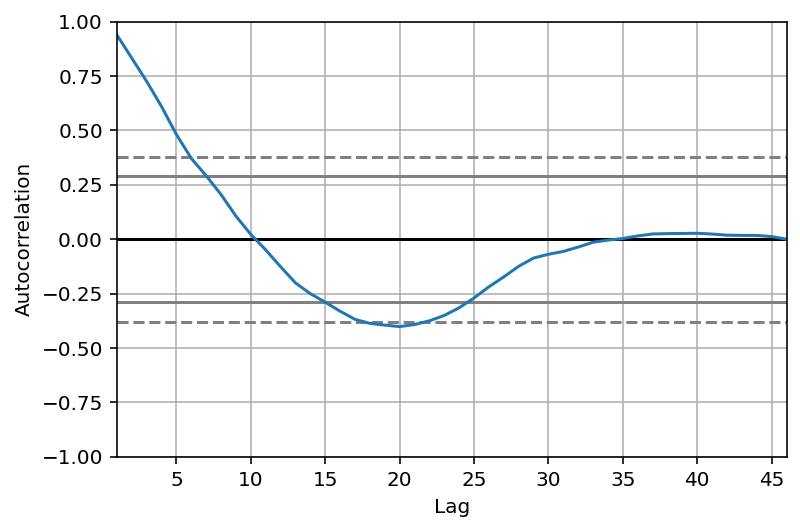

In [218]:
# Autocorrelation
from pandas import datetime
from pandas.plotting import autocorrelation_plot
 
series = r_PM25.loc[:45,'ANTOKOLSKY'].values
autocorrelation_plot(series)
# plt.ylim([-0.05,0.05])
plt.show()

In [219]:
np.argwhere(np.isnan(r_PM25.loc[:45,'ANTOKOLSKY'].values))
np.argwhere(np.isnan(r_PM25.loc[:,'ANTOKOLSKY'].values)).shape
r_PM25.shape

array([], shape=(0, 1), dtype=int64)

(12663, 1)

(122735, 36)

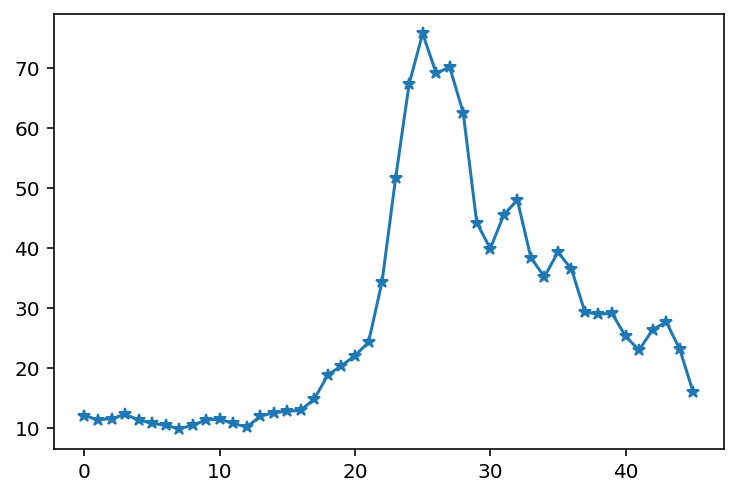

In [220]:
# define the series until non-nan
series = r_PM25.loc[:45,'ANTOKOLSKY'].values
plt.plot(series, '-*')
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   44
Model:                 ARIMA(5, 2, 0)   Log Likelihood                -130.541
Method:                       css-mle   S.D. of innovations              4.657
Date:                Sun, 07 Jun 2020   AIC                            275.083
Time:                        13:44:03   BIC                            287.572
Sample:                             2   HQIC                           279.714
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0920      0.426     -0.216      0.829      -0.928       0.744
ar.L1.D2.y     0.0441      0.148      0.298      0.766      -0.246       0.334
ar.L2.D2.y    -0.5064      0.145     -3.497      0.0

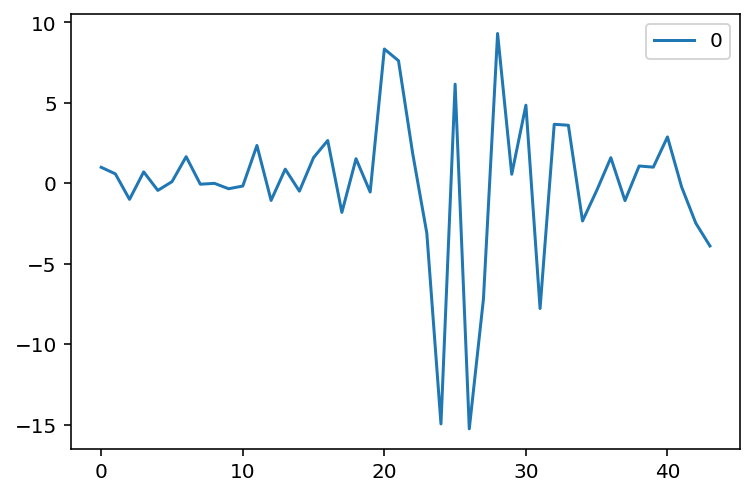

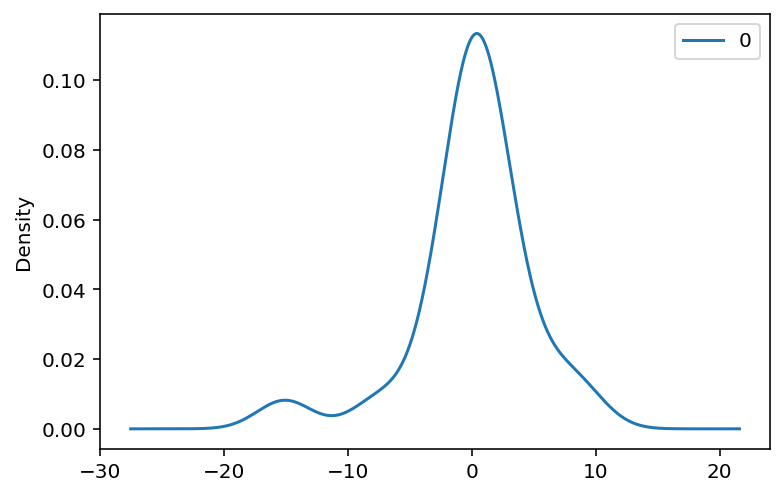

               0
count  44.000000
mean    0.018829
std     4.711837
min   -15.259910
25%    -1.017328
50%     0.329728
75%     1.704378
max     9.306973


In [221]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(series, order=(5,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [169]:
# in this model, ARIMA is fitted after every perdiction, so imputed values are 
# evetered (Rolling ARIMA).

predicted=21.169214, expected=39.900000


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=25.836857, expected=45.500000
predicted=44.438756, expected=48.000000
predicted=52.861260, expected=38.400000
predicted=28.207882, expected=35.200000
predicted=33.979422, expected=39.300000
predicted=39.760059, expected=36.500000
predicted=30.180493, expected=29.300000
predicted=27.021152, expected=29.000000
predicted=30.155588, expected=29.100000
predicted=24.400575, expected=25.300000
predicted=22.156982, expected=23.000000
predicted=23.421568, expected=26.400000
predicted=28.007751, expected=27.700000
predicted=25.919344, expected=23.200000
predicted=20.124493, expected=16.000000
Test rmse: 8.246
Test Median SE: 3.119
Test Mean SE: 5.486
Test r2: 0.062


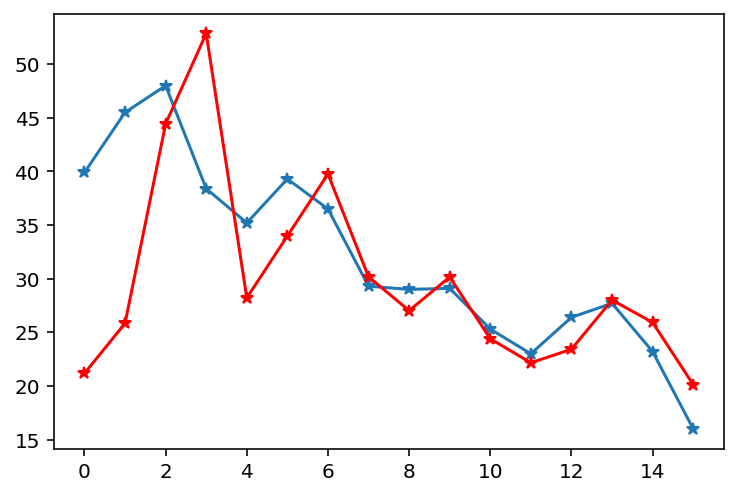

In [223]:
X = series
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat) # try extend
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
# MAE - median absolute error
mae1 = median_absolute_error(test, predictions)
# MAE - mean absolute error
mae2 = mean_absolute_error(test, predictions)
# r2
r2 = r2_score(test, predictions)

print('Test rmse: %.3f' % rmse)
print('Test Median SE: %.3f' % mae1)
print('Test Mean SE: %.3f' % mae2)
print('Test r2: %.3f' % r2)
# plot
plt.plot(test,'-*')
plt.plot(predictions,'-*', color='red')
plt.show();

In [ ]:
# change the trend to 2!
# check stationarity, seasonality (SARIMAX?)
# ARIMA implements by default Kalman filter, 
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html?highlight=arima
# https://stackoverflow.com/questions/55615203/sarimax-incremental-kalman-filter
# https://www.statsmodels.org/devel/examples/notebooks/generated/statespace_forecasting.html

#### Prophet 

In [158]:
# might be easier to use since I don't need to search the parameters by myself. 
# and can add holidays!

In [ ]:
# from fbprophet import Prophet

#### LSTM

# My implementation of KNN

# Interpolation methods
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html

in summary - methods are divided to 4 groups:
1. predicting based on the other stations (multivariate imputation (learning), my KNN - not learning. similar to SDEM I think). Here, easy to add day, week, hour and met. data, other pollutants... (not for KNN).
2. predicting based on time series - ARIMA, LSTM, Prophet (can add holidays!). looks VERY time-consuming. 
3. statistical imputation - based on monthly, hourly and weekly averages
4. interpolations - like average of the two missing edges. will probably work well only on short times. 

it might be interesting to use met. data and time of day and to see according to the way they contribute (or not), just how PM2.5 is correlated with them. the eqvivalent of using the arima or prophet that account for seasonality and so on is to add as predictors met. data and time of day/week/year. 

Originally, I tried to write a script that extracts all PM2.5 data available from environmental protection of Israel. But then I used Yuval's data from matlab (above). 

In [ ]:
# Arima models Vs. ML:
# https://towardsdatascience.com/facing-the-arima-model-against-neural-networks-745ba5a933ca

# time-series analysis in plurasight:

# FA and PCA in plurasight:
# https://app.pluralsight.com/course-player?clipId=9306a799-e3f5-41bc-bb65-474dafec524d
    
# FA in python:
# https://www.datacamp.com/community/tutorials/introduction-factor-analysis
# from factor_analyzer import FactorAnalyzer
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html#sklearn.decomposition.FactorAnalysis
# blind source seperation? if non-Gaussian priors on the latent variables are assumed.
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html#sphx-glr-auto-examples-decomposition-plot-ica-blind-source-separation-py
# https://scikit-learn.org/stable/modules/decomposition.html

# technically when we say FA we mean varimax-rotated principal component analysis

In [3]:
import numpy as np
import pandas as pd

In [20]:
# X = np.random.rand(10,5)

In [29]:
# X

In [74]:
G = np.random.rand(10,3)

In [75]:
F = np.random.rand(3,5)

In [76]:
G

array([[0.39887499, 0.25868312, 0.79348595],
       [0.5840844 , 0.87063411, 0.84165557],
       [0.16245394, 0.35716553, 0.28596862],
       [0.74534349, 0.22252331, 0.75446334],
       [0.65277712, 0.96770442, 0.30318783],
       [0.11232998, 0.41472656, 0.91533984],
       [0.74274971, 0.86629095, 0.44709888],
       [0.61750942, 0.64176317, 0.48511266],
       [0.7446682 , 0.50462566, 0.17565843],
       [0.22539797, 0.72084979, 0.73391664]])

In [77]:
F

array([[0.95959013, 0.22197795, 0.39603034, 0.95842235, 0.04710638],
       [0.28557944, 0.2614658 , 0.36862438, 0.17232797, 0.93638644],
       [0.18525169, 0.50439401, 0.00849516, 0.39499191, 0.72722094]])

In [78]:
X = np.matmul(G,F)
X

array([[0.6036257 , 0.5564078 , 0.26006429, 0.74028957, 0.83805652],
       [0.96503495, 0.78182093, 0.5594021 , 1.04228129, 1.45483363],
       [0.3108645 , 0.27368862, 0.19842596, 0.33020439, 0.55005994],
       [0.91853795, 0.60417885, 0.38361544, 1.05070776, 0.79213978],
       [0.95892103, 0.55084986, 0.61781462, 0.91215546, 1.15737979],
       [0.39579637, 0.59506353, 0.20514036, 0.54068038, 1.05929008],
       [1.042956  , 0.61689351, 0.61728556, 1.03775452, 1.17131101],
       [0.86569825, 0.54956051, 0.48524313, 0.89404414, 0.98281104],
       [0.89122799, 0.38584333, 0.48242077, 0.87005142, 0.63534574],
       [0.55810885, 0.6086941 , 0.36122198, 0.63014016, 1.21933119]])

In [79]:
np.reshape(G[:,2],(-1,1)).shape

(10, 1)

In [80]:
np.reshape(F[2,:],(1,-1)).shape

(1, 5)

In [81]:
# G1*F1 
# X matrix related to factor1
np.matmul(np.reshape(G[:,0],(-1,1)),np.reshape(F[0,:],(1,-1)))

array([[0.38275651, 0.08854145, 0.1579666 , 0.38229071, 0.01878956],
       [0.56048163, 0.12965386, 0.23131514, 0.55979955, 0.0275141 ],
       [0.1558892 , 0.03606119, 0.06433669, 0.15569949, 0.00765262],
       [0.71522426, 0.16544982, 0.29517863, 0.71435386, 0.03511043],
       [0.62639848, 0.14490213, 0.25851954, 0.62563619, 0.03074997],
       [0.10779074, 0.02493478, 0.04448608, 0.10765956, 0.00529146],
       [0.71273529, 0.16487406, 0.29415142, 0.71186792, 0.03498825],
       [0.59255594, 0.13707347, 0.24455246, 0.59183483, 0.02908863],
       [0.71457626, 0.16529992, 0.2949112 , 0.71370665, 0.03507862],
       [0.21628967, 0.05003338, 0.08926443, 0.21602645, 0.01061768]])

In [82]:
# G2*F2
# X matrix related to factor2
np.matmul(np.reshape(G[:,1],(-1,1)),np.reshape(F[1,:],(1,-1)))

array([[0.07387458, 0.06763679, 0.09535691, 0.04457834, 0.24222737],
       [0.2486352 , 0.22764104, 0.32093696, 0.1500346 , 0.81524997],
       [0.10199913, 0.09338657, 0.13165992, 0.06154961, 0.33444496],
       [0.06354808, 0.05818224, 0.08202752, 0.03834699, 0.20836781],
       [0.27635649, 0.25302161, 0.35671944, 0.16676253, 0.90614529],
       [0.11843738, 0.10843681, 0.15287832, 0.07146898, 0.38834433],
       [0.24739488, 0.22650546, 0.31933597, 0.14928616, 0.8111831 ],
       [0.18327437, 0.16779912, 0.23656955, 0.11059374, 0.60093833],
       [0.14411071, 0.13194235, 0.18601732, 0.08696111, 0.47252462],
       [0.20585988, 0.18847757, 0.26572281, 0.12422258, 0.67499396]])

In [83]:
# G3*F3
# X matrix related to factor3
np.matmul(np.reshape(G[:,2],(-1,1)),np.reshape(F[2,:],(1,-1)))

array([[0.14699461, 0.40022956, 0.00674079, 0.31342053, 0.57703959],
       [0.15591812, 0.42452603, 0.00715   , 0.33244714, 0.61206955],
       [0.05297617, 0.14424086, 0.00242935, 0.11295529, 0.20796237],
       [0.13976561, 0.38054679, 0.00640929, 0.29800691, 0.54866154],
       [0.05616606, 0.15292612, 0.00257563, 0.11975674, 0.22048453],
       [0.16956825, 0.46169194, 0.00777596, 0.36155183, 0.6656543 ],
       [0.08282582, 0.225514  , 0.00379818, 0.17660044, 0.32513966],
       [0.08986794, 0.24468792, 0.00412111, 0.19161557, 0.35278408],
       [0.03254102, 0.08860106, 0.00149225, 0.06938366, 0.12774249],
       [0.1359593 , 0.37018316, 0.00623474, 0.28989113, 0.53371954]])

In [ ]:
# change Q1

In [232]:
import operator as op
from functools import reduce

def nck(n, k):
    k = min(k, n-k)
    numer = reduce(op.mul, range(n, n-k, -1), 1)
    denom = reduce(op.mul, range(1, k+1), 1)
    return numer / denom

In [233]:
p = 0.8 #probability to ruin a toy
q = 1-p
n = 8 # number of toys each kid got
k = 6 #at least number of toys

In [234]:
no_toys_a_kid_ruins_a_day = 0
for i in range(k,n+1):
    no_toys_a_kid_ruins_a_day = no_toys_a_kid_ruins_a_day + nck(n,i)*(p**i)*(q**(n-i))

In [235]:
no_toys_a_kid_ruins_a_day

0.79691776

In [236]:
p1 = no_toys_a_kid_ruins_a_day
q1 = 1-p1
n1 = 11 # number of kids yudicolus have
k1 = 9 # at least number of kids

In [237]:
no_kids = 0
for i in range(k1,n1+1):
    no_kids = no_kids + nck(n1,i)*(p1**i)*(q1**(n1-i))

In [238]:
no_kids

0.607163697719032

In [ ]:
# change Q2

In [241]:
balls=26
winning=11

p = winning/balls
q=1-p
#a
n = 6
(1-p)**(n-1)*p #probability to only extract winning in the nth trial

0.027040137309141496

In [242]:
#b #E
1/p

2.3636363636363638

In [243]:
#b2 #Var
q/(p**2)

3.2231404958677685

In [244]:
until = 3
k = 10 

p*q**(until-1)

0.1408170232134729

In [245]:
# import datetime
# import numpy as np
# import pandas as pd

# import plotly.graph_objects as go
# from ipywidgets import widgets

In [248]:
# df = pd.read_csv('https://raw.githubusercontent.com/yankev/testing/master/datasets/nycflights.csv')
# df = df.drop(df.columns[[0]], axis=1)

In [255]:
# df = pd.DataFrame([[2013,9,19,1846.0,16.0,2250.0,np.NAN,'DL','N909DL',2391,'JFK','TPA',np.NAN],
#                    [2012,2,1,1146.0,0,1350.0,-11,'FL','N969AT',353,'LGA','CAK',65]],columns =
#                   ['year','month','day','dep_time','dep_delay','arr_time','arr_delay','carrier','tailnum',
#                    'flight','origin','dest','air_time'])

In [256]:
# df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time
0,2013,9,19,1846.0,16.0,2250.0,NaN,DL,N909DL,2391,JFK,TPA,NaN
1,2012,2,1,1146.0,0.0,1350.0,-11.0,FL,N969AT,353,LGA,CAK,65.0


# Import

In [1]:
import requests
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import itertools
import metpy as mp
import metpy.calc as mpcalc
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from scipy import special
import ipywidgets as widgets
from metpy.units import units


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format = 'retina'

# Functions 

In [93]:
# extraction is in UTC time. it gives you results for UTC time. 
# the true corresponding time in Israel it was 2 or 3 hours later
def get_station_props():
    station_names = []
    station_ids = []
    station_latitude = []
    station_longitude = []
    myUrl = 'https://api.svivaaqm.net/v1/envista/stations/?from=2019-11-01T00:00&to=2019/11/01T00:30'
    head = {'Authorization': 'ApiToken {}'.format(myToken), 'envi-data-source': 'MANA'}
    response = requests.get(myUrl, headers=head)
    j_response = response.json()
    for row in j_response:
        station_ids.append(row['stationId'])
        station_names.append(row['name'])
        station_latitude.append(row['location']['latitude'])
        station_longitude.append(row['location']['longitude'])
    return station_ids,station_names,station_latitude,station_longitude

def get_data_by_stationId(from_date, to_date, stationId):
    myUrl = 'https://api.svivaaqm.net/v1/envista/stations/'+stationId+'/data?from='+from_date+'&to='+to_date
    head = {'Authorization': 'ApiToken {}'.format(myToken), 'envi-data-source': 'MANA'}
    response = requests.get(myUrl, headers=head)
    return response

# use this to get column names and units of the station
def get_column_names(stationId):
    myUrl = 'https://api.svivaaqm.net/v1/envista/stations/'+stationId+'?from=2019-12-01T00:00&to=2019/12/01T00:06'
    head = {'Authorization': 'ApiToken {}'.format(myToken), 'envi-data-source': 'MANA'}
    response = requests.get(myUrl, headers=head)
    # units
    extract = response.json()['monitors']
    units = dict()
    for e in extract:
        units.update({e['name']:e['units']})
    column_names = [i + ' [' + j +']' for i, j in units.items()]
    return list(units.keys()), column_names


def get_dataFrame(dict_train,stationId):
    dates = []
    for row in dict_train:
        dates.append(row['datetime'])

    pollutants = []
    for row in dict_train:
        pollutant = dict()
        for p in row['channels']:
            pollutant.update({p['name']:p['value']})
        pollutants.append(pollutant)

    cols, station_columns = get_column_names(str(stationId))

    total_list = []
    for c in cols: #number of columns(j)
        vals = []
        for p in pollutants: #number of rows or values(i)
            if p[c] is not None:
                vals.append(p[c])
            else:
                vals.append(np.NaN)
        total_list.append(vals)

    data_df = pd.DataFrame(np.transpose(total_list), index = pd.to_datetime(dates,utc=True).tz_convert('Israel'), columns = station_columns)
    
    return data_df

In [94]:
myToken = '71e67c41-8478-4310-9293-196f559493ca'

In [95]:
# get a list of station names, ids, latitude and longitude
station_ids,station_names,station_latitude, station_longitude = get_station_props()

In [ ]:
# constract a dataframe of station properties

In [101]:
prop_df = pd.DataFrame(np.transpose([station_ids,station_names,station_latitude,station_longitude]), columns = ['station_ids','station_names','station_latitude','station_longitude'])

In [102]:
df.set_index('month')

,station_ids,station_names,station_latitude,station_longitude
0,1,עפולה,32.6033,35.291
1,2,עמיאל,32.047,34.7926
2,3,אריאל,32.1035,35.1678
3,5,בר אילן -י''ם,31.7945,35.22
4,6,באר שבע,31.2567,34.7813
...,...,...,...,...
153,465,אלעד,32.0593,34.9517
154,467,לב אשדוד,31.7969,34.6483
155,468,אביגדור,31.711,34.745
156,469,תימורים,31.7159,34.7552


In [92]:
# extract all stations info for the last X time by days

In [53]:
# getting data of last x months or days (in LOCAL TIME (now) or UTC time (utcnow)) for a specific station
num_days = 30
to_time = pd.Timestamp.utcnow().to_pydatetime().strftime('%Y-%m-%dT%H:%M')
from_time = (pd.Timestamp.utcnow().to_pydatetime() - relativedelta(days=num_days)).strftime('%Y-%m-%dT%H:%M')

In [55]:
for SI in str(station_ids[0]):
    stationData = get_data_by_stationId(from_time, to_time,SI)

In [56]:
stationData

<Response [200]>

In [57]:
dict_train = stationData.json()['data']
df1 = get_dataFrame(dict_train,SI)

In [59]:
df1.tail()

,SO2 [ppb],No [ppb],Nox [ppb],No2 [ppb],O3 [ppb],PM10 [µg/m3],WS [m/sec],WD [deg],Temp [°c],RH [%],GSR [w/m2],StWd [deg],PM2.5 [µg/m3]
2020-04-21 10:55:00+03:00,1.6,2.4,13.8,11.4,48.5,44.0,2.4,157.0,26.0,52.0,974.5,18.6,-9999.0
2020-04-21 11:00:00+03:00,1.4,1.9,11.5,9.6,48.3,44.0,2.3,120.0,26.0,52.0,964.5,16.9,-9999.0
2020-04-21 11:05:00+03:00,1.3,2.4,13.3,10.9,46.9,44.0,1.9,134.0,26.3,53.0,961.8,22.4,-9999.0
2020-04-21 11:10:00+03:00,1.4,2.2,11.5,9.4,48.9,44.0,2.7,134.0,26.2,52.0,921.3,13.6,-9999.0
2020-04-21 11:15:00+03:00,1.4,1.6,10.8,8.9,47.3,44.0,2.5,139.0,26.0,54.0,897.3,12.9,-9999.0
